In [8]:
%pip install -r ../requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 40.2 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.9/304.9 kB 339.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.2/150.2 kB 376.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 269.6 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of s3fs to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of s3fs to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 350.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 101.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [862]:
import warnings
import pandas as pd
import numpy as np
from constants import *
from datasets_tourism import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
warnings.filterwarnings("ignore")

In [587]:
START_DATE = "2023-07-01"
END_DATE = "2023-09-30"
SPECIFIC_DAY = "2023-07-29"

# Analyse the attendance at spiaggia

In [588]:
contapersone_presenze_df.rename(columns={"data": "date"}, inplace=True)
contapersone_presenze_df["date"] = pd.to_datetime(contapersone_presenze_df["date"]) # or contapersone_presenze_df["date"].map(pd.to_datetime)
#contapersone_presenze_df = contapersone_presenze_df[(contapersone_presenze_df['date'] >= START_DATE) & (contapersone_presenze_df['date'] <= END_DATE)] 

varchi = contapersone_presenze_df['varco'].unique()
contapersone = contapersone_presenze_df.copy()
for v in varchi:
    contapersone[v] = contapersone['presenze'] * (contapersone['varco'] == v)
contapersone = contapersone.drop(columns=['varco']).groupby('date').sum().reset_index().rename(columns={'presenze':'contapersone'})
contapersone

,date,contapersone,Varco 1,Varco 2,Varco 3,Varco 4,Varco 5,Varco 6,Varco 7,Varco 8,Varco 9
0,2023-07-15,1496,183,204,304,199,117,83,161,105,140
1,2023-07-16,2143,299,305,340,321,157,137,228,106,250
2,2023-07-17,1663,175,262,307,144,135,77,140,64,359
3,2023-07-18,1518,129,300,280,152,117,83,146,73,238
4,2023-07-19,1345,111,153,309,109,130,65,137,55,276
...,...,...,...,...,...,...,...,...,...,...,...
65,2023-09-18,1081,61,55,107,152,50,73,174,77,332
66,2023-09-19,1468,104,69,175,210,83,141,249,116,321
67,2023-09-20,1699,187,52,122,206,121,123,260,105,523
68,2023-09-21,2382,427,83,114,390,236,185,343,185,419


In [589]:
print(f"Standard deviation: {contapersone['contapersone'].std()}, Mean: {contapersone['contapersone'].mean()}")

Standard deviation: 1029.2480119904703, Mean: 2238.5285714285715


In [590]:
scaler = MinMaxScaler()#StandardScaler()
contapersone["contapersone_scaled"] = scaler.fit_transform(contapersone[["contapersone"]])
contapersone

,date,contapersone,Varco 1,Varco 2,Varco 3,Varco 4,Varco 5,Varco 6,Varco 7,Varco 8,Varco 9,contapersone_scaled
0,2023-07-15,1496,183,204,304,199,117,83,161,105,140,0.190840
1,2023-07-16,2143,299,305,340,321,157,137,228,106,250,0.355471
2,2023-07-17,1663,175,262,307,144,135,77,140,64,359,0.233333
3,2023-07-18,1518,129,300,280,152,117,83,146,73,238,0.196438
4,2023-07-19,1345,111,153,309,109,130,65,137,55,276,0.152417
...,...,...,...,...,...,...,...,...,...,...,...,...
65,2023-09-18,1081,61,55,107,152,50,73,174,77,332,0.085242
66,2023-09-19,1468,104,69,175,210,83,141,249,116,321,0.183715
67,2023-09-20,1699,187,52,122,206,121,123,260,105,523,0.242494
68,2023-09-21,2382,427,83,114,390,236,185,343,185,419,0.416285


## Vodafone attendances

In [853]:
vodafone_attendences_STR_df

,date,locType,locId,userCountry,userProfile,userCluster,value
0,2022-01-01,AL_2,22,STR,COMMUTER,STR,293
1,2022-01-01,AL_2,22,STR,TOURIST,STR,41428
2,2022-01-01,AL_2,22,STR,VISITOR,STR,9519
3,2022-01-01,TN_MKT_AL_3,104,STR,COMMUTER,STR,0
4,2022-01-01,TN_MKT_AL_3,104,STR,TOURIST,STR,0
...,...,...,...,...,...,...,...
304378,2024-03-31,TN_MKT_POI,STAZ_ROVE,STR,TOURIST,STR,25
304379,2024-03-31,TN_MKT_POI,STAZ_ROVE,STR,VISITOR,STR,51
304380,2024-03-31,TN_MKT_POI,STAZ_TREN,STR,COMMUTER,STR,0
304381,2024-03-31,TN_MKT_POI,STAZ_TREN,STR,TOURIST,STR,50


In [854]:
vodafone_attendences_df

,date,locType,locId,userCountry,userProfile,userCluster,value
0,2022-01-01,AL_2,22,ALB,COMMUTER,None,0
1,2022-01-01,AL_2,22,ALB,TOURIST,None,862
2,2022-01-01,AL_2,22,ALB,VISITOR,None,44
3,2022-01-01,AL_2,22,AND,TOURIST,None,0
4,2022-01-01,AL_2,22,AND,VISITOR,None,0
...,...,...,...,...,...,...,...
4584498,2024-03-31,TN_MKT_POI,STAZ_TREN,SRB,VISITOR,UE,0
4584499,2024-03-31,TN_MKT_POI,STAZ_TREN,SWE,TOURIST,UE,0
4584500,2024-03-31,TN_MKT_POI,STAZ_TREN,SWE,VISITOR,UE,0
4584501,2024-03-31,TN_MKT_POI,STAZ_TREN,USA,TOURIST,None,0


In [858]:
vodafone_attendences_df[vodafone_attendences_df["userCountry"] != "ITA"]

,date,locType,locId,userCountry,userProfile,userCluster,value
0,2022-01-01,AL_2,22,ALB,COMMUTER,None,0
1,2022-01-01,AL_2,22,ALB,TOURIST,None,862
2,2022-01-01,AL_2,22,ALB,VISITOR,None,44
3,2022-01-01,AL_2,22,AND,TOURIST,None,0
4,2022-01-01,AL_2,22,AND,VISITOR,None,0
...,...,...,...,...,...,...,...
4584498,2024-03-31,TN_MKT_POI,STAZ_TREN,SRB,VISITOR,UE,0
4584499,2024-03-31,TN_MKT_POI,STAZ_TREN,SWE,TOURIST,UE,0
4584500,2024-03-31,TN_MKT_POI,STAZ_TREN,SWE,VISITOR,UE,0
4584501,2024-03-31,TN_MKT_POI,STAZ_TREN,USA,TOURIST,None,0


In [866]:
attendances_timeframe_df = vodafone_attendences_ALL_df[
    (vodafone_attendences_ALL_df["date"] >= START_DATE) &
    (vodafone_attendences_ALL_df["date"] <= END_DATE) &
    (vodafone_attendences_ALL_df["value"] != 0) &
    (vodafone_attendences_ALL_df["userProfile"] != 'INHABITANT') &
    (vodafone_attendences_ALL_df["userProfile"] != 'COMMUTER') &
    (    ((vodafone_attendences_ALL_df["locId"] == LOC_ID_APT_MOLVENO) & (vodafone_attendences_ALL_df["locType"] == LOC_TYPE_APT_MOLVENO)) | 
         ((vodafone_attendences_ALL_df["locId"] == LOC_ID_COMUNE_MOLVENO) & (vodafone_attendences_ALL_df["locType"] == LOC_TYPE_COMUNE_MOLVENO)) | 
         ((vodafone_attendences_ALL_df["locId"] == LOC_ID_COMUNE_ANDALO) & (vodafone_attendences_ALL_df["locType"] == LOC_TYPE_COMUNE_ANDALO)) | 
         ((vodafone_attendences_ALL_df["locId"] == LOC_ID_LAGO_MOLVENO) & (vodafone_attendences_ALL_df["locType"] == LOC_TYPE_LAGO_MOLVENO))
    )
]
attendances_timeframe_df

,date,locType,locId,userCountry,userProfile,userCluster,value
2976672,2023-07-01,TN_MKT_AL_3,166,CZE,TOURIST,CZ,18
2976674,2023-07-01,TN_MKT_AL_3,166,DEU,TOURIST,DE,22
2976675,2023-07-01,TN_MKT_AL_3,166,DEU,VISITOR,DE,32
2976676,2023-07-01,TN_MKT_AL_3,166,DNK,TOURIST,UE,18
2976686,2023-07-01,TN_MKT_AL_3,166,ISR,TOURIST,None,36
...,...,...,...,...,...,...,...
4821882,2023-09-30,TN_MKT_AL_3,27,STR,VISITOR,STR,581
4822040,2023-09-30,TN_MKT_AM_22,105,STR,TOURIST,STR,3941
4822041,2023-09-30,TN_MKT_AM_22,105,STR,VISITOR,STR,1976
4822063,2023-09-30,TN_MKT_POI,LAGO_MOLV,STR,TOURIST,STR,934


In [868]:
attendances_timeframe_df["locId"].unique()

array(['166', '27', '105', 'LAGO_MOLV'], dtype=object)

# Compare the ratio of tourists on the beach to the tourists in Molveno

**Question 1: What is the rate of Molveno's tourists that visit also spiaggia?** <br/>
Does this ratio change over different periods of time? <br/>
What is the range of ratio's change? <br/>
Do we need to model different constraints based on these ratios? <br/>

In [269]:
grouped_vodafone_presences = vodafone_attendences_df.groupby(["date", "locId", "userProfile"])[["value"]].sum().reset_index()
grouped_vodafone_presences

,date,locId,userProfile,value
0,2022-01-01,100,COMMUTER,250
1,2022-01-01,100,INHABITANT,5749
2,2022-01-01,100,TOURIST,17429
3,2022-01-01,100,VISITOR,5929
4,2022-01-01,101,COMMUTER,308
...,...,...,...,...
478703,2024-03-31,STAZ_ROVE,VISITOR,1002
478704,2024-03-31,STAZ_TREN,COMMUTER,189
478705,2024-03-31,STAZ_TREN,INHABITANT,1561
478706,2024-03-31,STAZ_TREN,TOURIST,332


In [870]:
# presences in Molveno
vod_presences_molveno = grouped_vodafone_presences[grouped_vodafone_presences["locId"] == LOC_ID_COMUNE_MOLVENO]
# presences on the beach
vod_presences_lago = grouped_vodafone_presences[grouped_vodafone_presences["locId"] == LOC_ID_LAGO_MOLVENO]
# merge the values of lago and Molveno
merged_presences_molveno_lago = vod_presences_molveno.merge(vod_presences_lago, on=["date", "userProfile"], suffixes=('_molveno', '_lago'))
merged_presences_molveno_lago["date"] = pd.to_datetime(merged_presences_molveno_lago["date"])

# Calculate the ratio of Molveno's visitors that go to spiaggia
merged_presences_molveno_lago["ratio_lago_comune"] = (merged_presences_molveno_lago["value_lago"] / merged_presences_molveno_lago["value_molveno"]) * 100
merged_presences_molveno_lago = merged_presences_molveno_lago[
    (merged_presences_molveno_lago["date"] >= START_DATE) &
    (merged_presences_molveno_lago["date"] <= END_DATE) &
    (merged_presences_molveno_lago["userProfile"].isin(["TOURIST", "VISITOR"]))
]    
merged_presences_molveno_lago = merged_presences_molveno_lago[merged_presences_molveno_lago["date"].isin(contapersone["date"])]

merged_presences_molveno_lago["ratio_lago_comune"] = merged_presences_molveno_lago["ratio_lago_comune"].replace(np.inf, 0).fillna(0)
merged_presences_molveno_lago["ratio_lago_comune"] = merged_presences_molveno_lago["ratio_lago_comune"].apply(lambda el: int(el))
merged_presences_molveno_lago.sort_values(by=["ratio_lago_comune"], ascending=False)
merged_presences_molveno_lago

,date,locId_molveno,userProfile,value_molveno,locId_lago,value_lago,ratio_lago_comune
2241,2023-07-15,27,TOURIST,4635,LAGO_MOLV,3833,82
2242,2023-07-15,27,VISITOR,5396,LAGO_MOLV,3636,67
2245,2023-07-16,27,TOURIST,4357,LAGO_MOLV,3660,84
2246,2023-07-16,27,VISITOR,6592,LAGO_MOLV,4756,72
2249,2023-07-17,27,TOURIST,3775,LAGO_MOLV,3149,83
...,...,...,...,...,...,...,...
2510,2023-09-20,27,VISITOR,1126,LAGO_MOLV,830,73
2513,2023-09-21,27,TOURIST,2129,LAGO_MOLV,1678,78
2514,2023-09-21,27,VISITOR,1109,LAGO_MOLV,850,76
2517,2023-09-22,27,TOURIST,2550,LAGO_MOLV,2015,79


In [611]:
tourists_presences = merged_presences_molveno_lago[merged_presences_molveno_lago["userProfile"] == "TOURIST"]
excursionist_presences = merged_presences_molveno_lago[merged_presences_molveno_lago["userProfile"] == "VISITOR"]
# scaler for tourists values
tourists_presences["ratio_lago_comune_scaled"] = scaler.fit_transform(tourists_presences[["ratio_lago_comune"]]) 
tourists_presences["presenze_lago"] = scaler.fit_transform(tourists_presences[["value_lago"]]) 

# scaler for excursionist values
excursionist_presences["ratio_lago_comune_scaled"] = scaler.fit_transform(excursionist_presences[["ratio_lago_comune"]]) 
excursionist_presences["presenze_lago"] = scaler.fit_transform(excursionist_presences[["value_lago"]]) 
excursionist_presences.sort_values(by=["ratio_lago_comune"], ascending=False)

,date,locId_molveno,userProfile,value_molveno,locId_lago,value_lago,ratio_lago_comune,ratio_lago_comune_scaled,presenze_lago
2502,2023-09-18,27,VISITOR,617,LAGO_MOLV,593,96,1.000000,0.005193
2482,2023-09-13,27,VISITOR,644,LAGO_MOLV,585,90,0.853659,0.003895
2518,2023-09-22,27,VISITOR,646,LAGO_MOLV,561,86,0.756098,0.000000
2414,2023-08-27,27,VISITOR,1498,LAGO_MOLV,1200,80,0.609756,0.103700
2366,2023-08-15,27,VISITOR,8808,LAGO_MOLV,6723,76,0.512195,1.000000
...,...,...,...,...,...,...,...,...,...
2494,2023-09-16,27,VISITOR,2823,LAGO_MOLV,1634,57,0.048780,0.174132
2290,2023-07-27,27,VISITOR,3687,LAGO_MOLV,2099,56,0.024390,0.249594
2286,2023-07-26,27,VISITOR,3835,LAGO_MOLV,2120,55,0.000000,0.253002
2278,2023-07-24,27,VISITOR,1820,LAGO_MOLV,1003,55,0.000000,0.071730


<Axes: xlabel='value_lago', ylabel='ratio_lago_comune'>

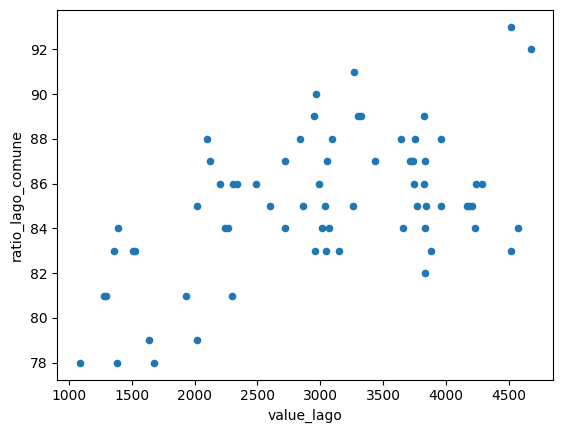

In [612]:
tourists_presences.plot.scatter(x="value_lago", y="ratio_lago_comune")

<Axes: xlabel='value_lago', ylabel='ratio_lago_comune'>

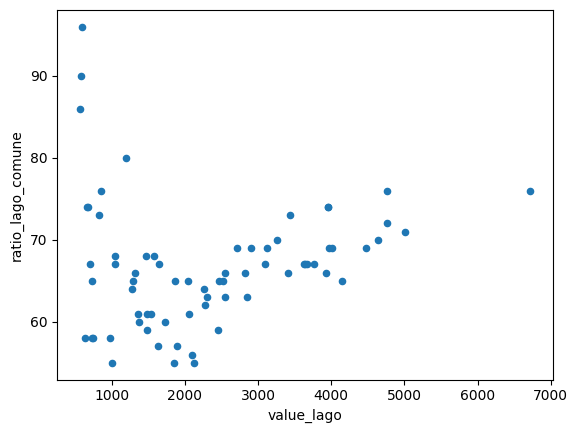

In [613]:
excursionist_presences.plot.scatter(x="value_lago", y="ratio_lago_comune")

<Axes: xlabel='date'>

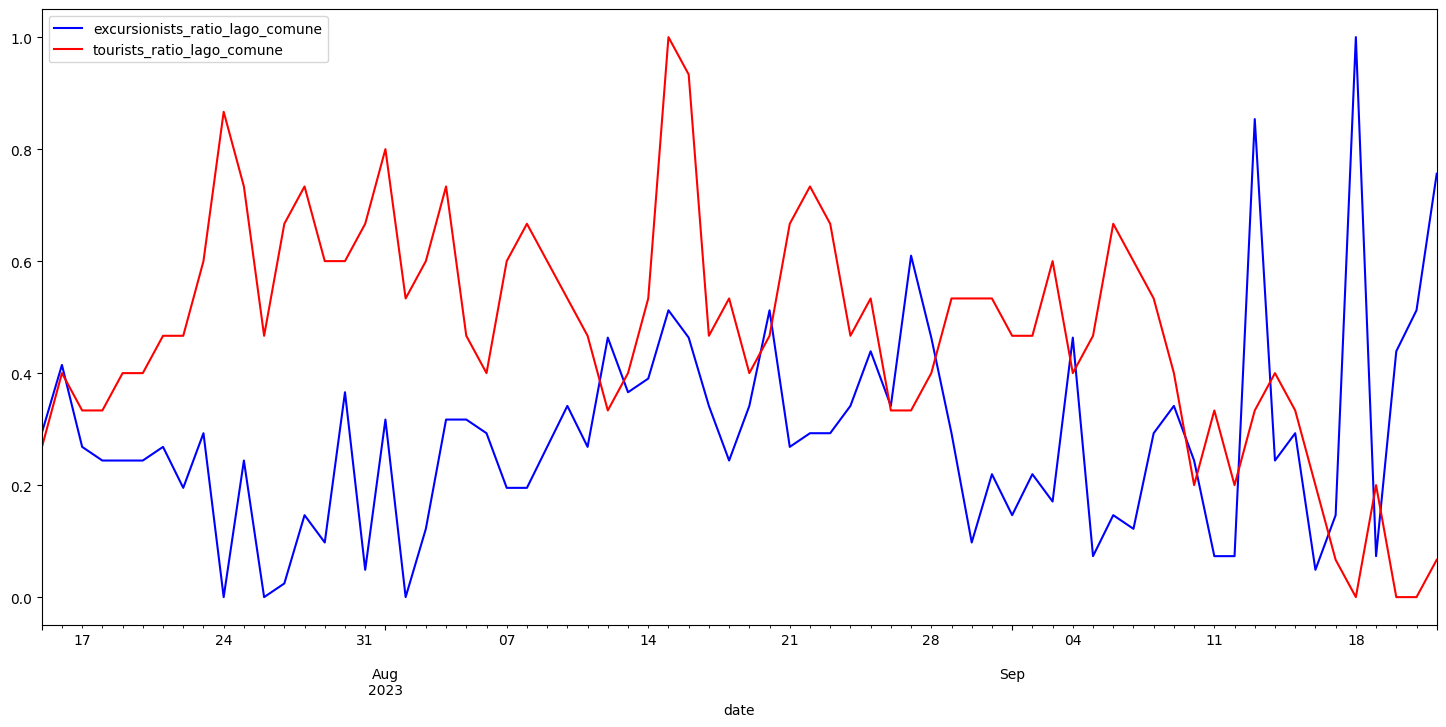

In [614]:
ax = excursionist_presences[["date", "ratio_lago_comune_scaled", "userProfile"]].plot(kind="line", x="date", y="ratio_lago_comune_scaled", label="excursionists_ratio_lago_comune", color="blue")
tourists_presences[["date", "ratio_lago_comune_scaled", "userProfile"]].plot(kind="line", ax=ax, x="date", y="ratio_lago_comune_scaled", label="tourists_ratio_lago_comune", color="red", figsize=(18, 8))

### The ratio of Molveno's tourists and excursionists that go to Spiagga

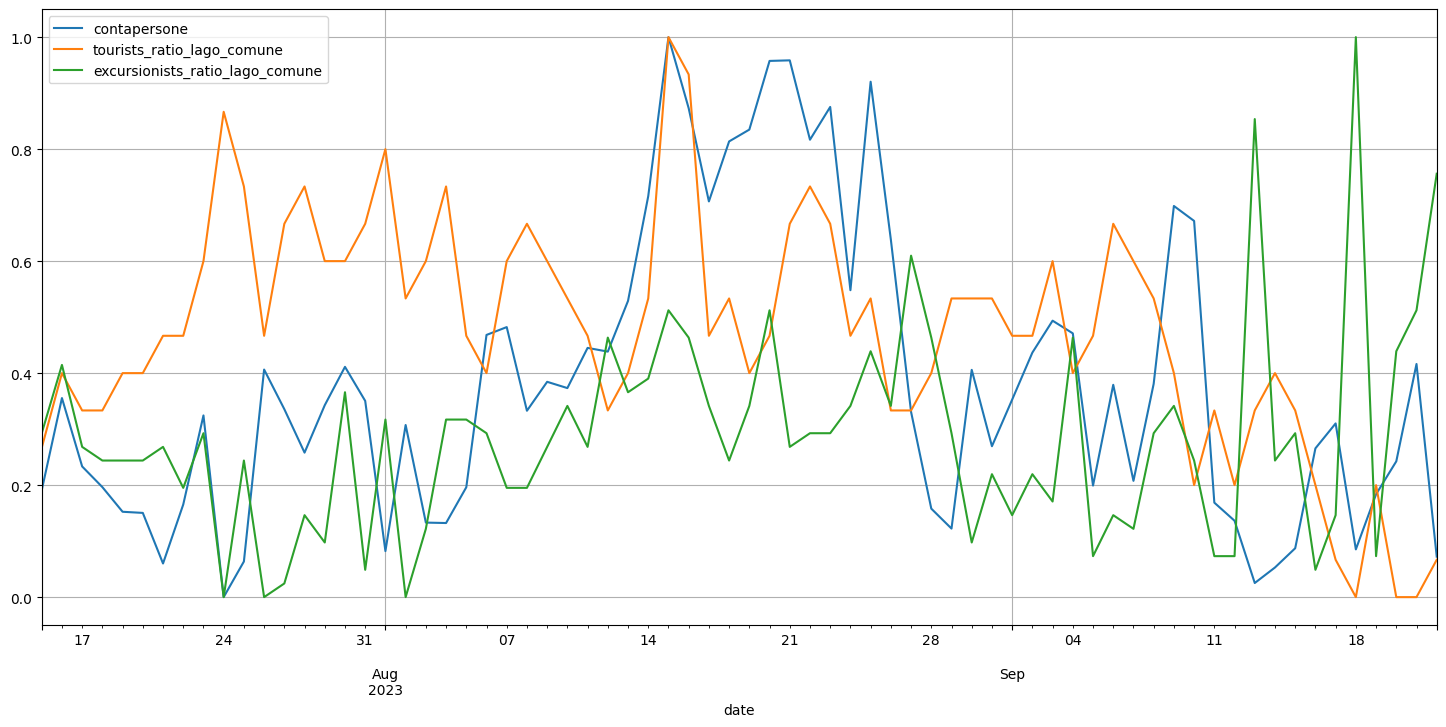

In [615]:
ax = contapersone[["date", "contapersone_scaled"]].plot(x="date", y="contapersone_scaled", label="contapersone")
tourists_presences[["date", "ratio_lago_comune_scaled", "presenze_lago"]].plot(ax=ax, x="date", y="ratio_lago_comune_scaled", label="tourists_ratio_lago_comune")
excursionist_presences[["date", "ratio_lago_comune_scaled", "presenze_lago"]].plot(ax=ax, x="date", y="ratio_lago_comune_scaled", label="excursionists_ratio_lago_comune", figsize=(18,8))
plt.grid()

### The comparison of Lago's toursists and excursionists attendance

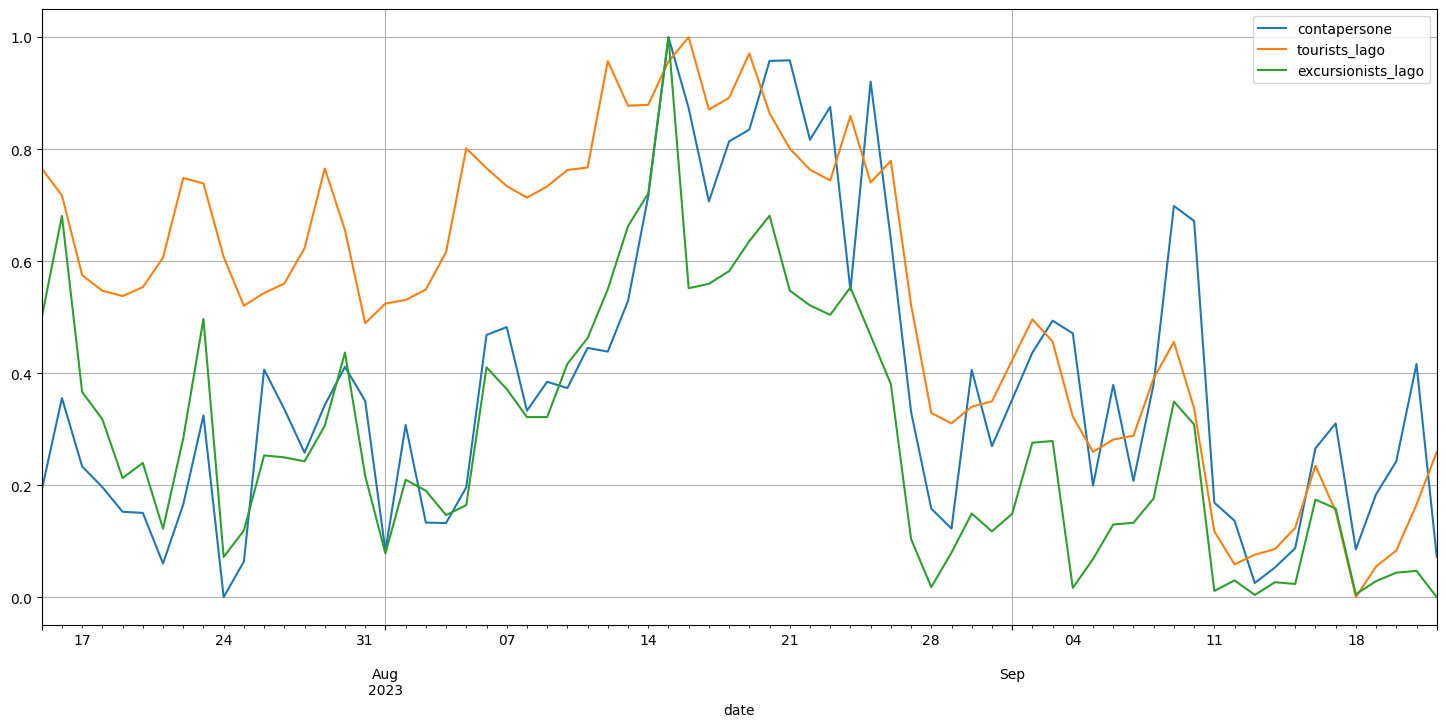

In [616]:
ax = contapersone[["date", "contapersone_scaled"]].plot(x="date", y="contapersone_scaled", label="contapersone")
tourists_presences[["date", "presenze_lago"]].plot(ax=ax, x="date", y="presenze_lago", label="tourists_lago")
excursionist_presences[["date", "presenze_lago"]].plot(ax=ax, x="date", y="presenze_lago", label="excursionists_lago", figsize=(18,8))
plt.grid()

In [617]:
excursionist_presences

,date,locId_molveno,userProfile,value_molveno,locId_lago,value_lago,ratio_lago_comune,ratio_lago_comune_scaled,presenze_lago
2242,2023-07-15,27,VISITOR,5396,LAGO_MOLV,3636,67,0.292683,0.499026
2246,2023-07-16,27,VISITOR,6592,LAGO_MOLV,4756,72,0.414634,0.680785
2250,2023-07-17,27,VISITOR,4257,LAGO_MOLV,2818,66,0.268293,0.366277
2254,2023-07-18,27,VISITOR,3827,LAGO_MOLV,2518,65,0.243902,0.317592
2258,2023-07-19,27,VISITOR,2876,LAGO_MOLV,1871,65,0.243902,0.212593
...,...,...,...,...,...,...,...,...,...
2502,2023-09-18,27,VISITOR,617,LAGO_MOLV,593,96,1.000000,0.005193
2506,2023-09-19,27,VISITOR,1253,LAGO_MOLV,737,58,0.073171,0.028562
2510,2023-09-20,27,VISITOR,1126,LAGO_MOLV,830,73,0.439024,0.043655
2514,2023-09-21,27,VISITOR,1109,LAGO_MOLV,850,76,0.512195,0.046900


In [618]:
vodafone_contapersone_df = pd.concat([
    excursionist_presences[["date", "ratio_lago_comune_scaled", "presenze_lago"]].set_index("date").rename(columns={"presenze_lago": "presenze_lago_excusrionists", "ratio_lago_comune_scaled": "ratio_lago_comune_scaled_excursionists"}),
    tourists_presences[["date", "ratio_lago_comune_scaled", "presenze_lago"]].set_index("date").rename(columns={"presenze_lago": "presenze_lago_tourists", "ratio_lago_comune_scaled": "ratio_lago_comune_scaled_tourists"}),
    contapersone[["date", "contapersone_scaled"]].set_index("date")
], axis=1)
vodafone_contapersone_df.corr()

,ratio_lago_comune_scaled_excursionists,presenze_lago_excusrionists,ratio_lago_comune_scaled_tourists,presenze_lago_tourists,contapersone_scaled
ratio_lago_comune_scaled_excursionists,1.000000,0.109677,-0.298525,0.012172,0.125345
presenze_lago_excusrionists,0.109677,1.000000,0.350007,0.842538,0.775338
ratio_lago_comune_scaled_tourists,-0.298525,0.350007,1.000000,0.533939,0.272408
presenze_lago_tourists,0.012172,0.842538,0.533939,1.000000,0.597868
contapersone_scaled,0.125345,0.775338,0.272408,0.597868,1.000000


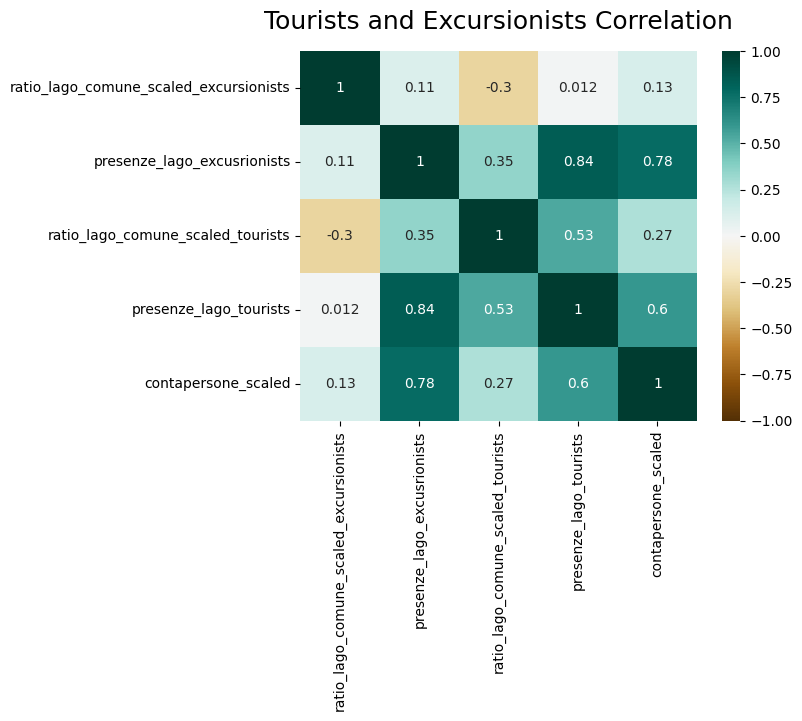

In [619]:
import seaborn as sns
heatmap = sns.heatmap(vodafone_contapersone_df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Tourists and Excursionists Correlation', fontdict={'fontsize':18}, pad=16);

In [620]:
vodafone_contapersone_df = pd.concat([
    excursionist_presences[["date", "ratio_lago_comune", "value_lago"]].set_index("date").rename(columns={"value_lago": "value_lago_excusrionists", "ratio_lago_comune": "ratio_lago_comune_excursionists"}),
    tourists_presences[["date", "ratio_lago_comune", "value_lago"]].set_index("date").rename(columns={"value_lago": "value_lago_tourists", "ratio_lago_comune": "ratio_lago_comune_tourists"}),
    contapersone[["date", "contapersone"]].set_index("date")
], axis=1)

vodafone_contapersone_df.reset_index(inplace=True)
vodafone_contapersone_df

,date,ratio_lago_comune_excursionists,value_lago_excusrionists,ratio_lago_comune_tourists,value_lago_tourists,contapersone
0,2023-07-15,67,3636,82,3833,1496
1,2023-07-16,72,4756,84,3660,2143
2,2023-07-17,66,2818,83,3149,1663
3,2023-07-18,65,2518,83,3049,1518
4,2023-07-19,65,1871,84,3015,1345
...,...,...,...,...,...,...
65,2023-09-18,96,593,78,1085,1081
66,2023-09-19,58,737,81,1281,1468
67,2023-09-20,73,830,78,1384,1699
68,2023-09-21,76,850,78,1678,2382


## Ferragosto Timeframe

Question 1: What is the rate of Molveno's tourists that visit also spiaggia? <br/>
**Does this ratio change over different periods of time?** <br/>
What is the range of ratio's change? <br/>
Do we need to model different constraints based on these ratios? <br/>

In [317]:
ferragosto_vod_contapersone_df = vodafone_contapersone_df[(vodafone_contapersone_df["date"] >= "2023-08-08") & (vodafone_contapersone_df["date"] <= "2023-08-25")]
ferragosto_vod_contapersone_df

,date,ratio_lago_comune_excursionists,value_lago_excusrionists,ratio_lago_comune_tourists,value_lago_tourists,contapersone
24,2023-08-08,63,2542,88,3646,2054
25,2023-08-09,66,2542,87,3718,2257
26,2023-08-10,69,3127,86,3823,2213
27,2023-08-11,66,3411,85,3839,2495
28,2023-08-12,74,3949,83,4521,2469
29,2023-08-13,70,4643,84,4235,2825
30,2023-08-14,71,5003,86,4241,3560
31,2023-08-15,76,6723,93,4519,4676
32,2023-08-16,74,3960,92,4675,4177
33,2023-08-17,69,4009,85,4211,3523


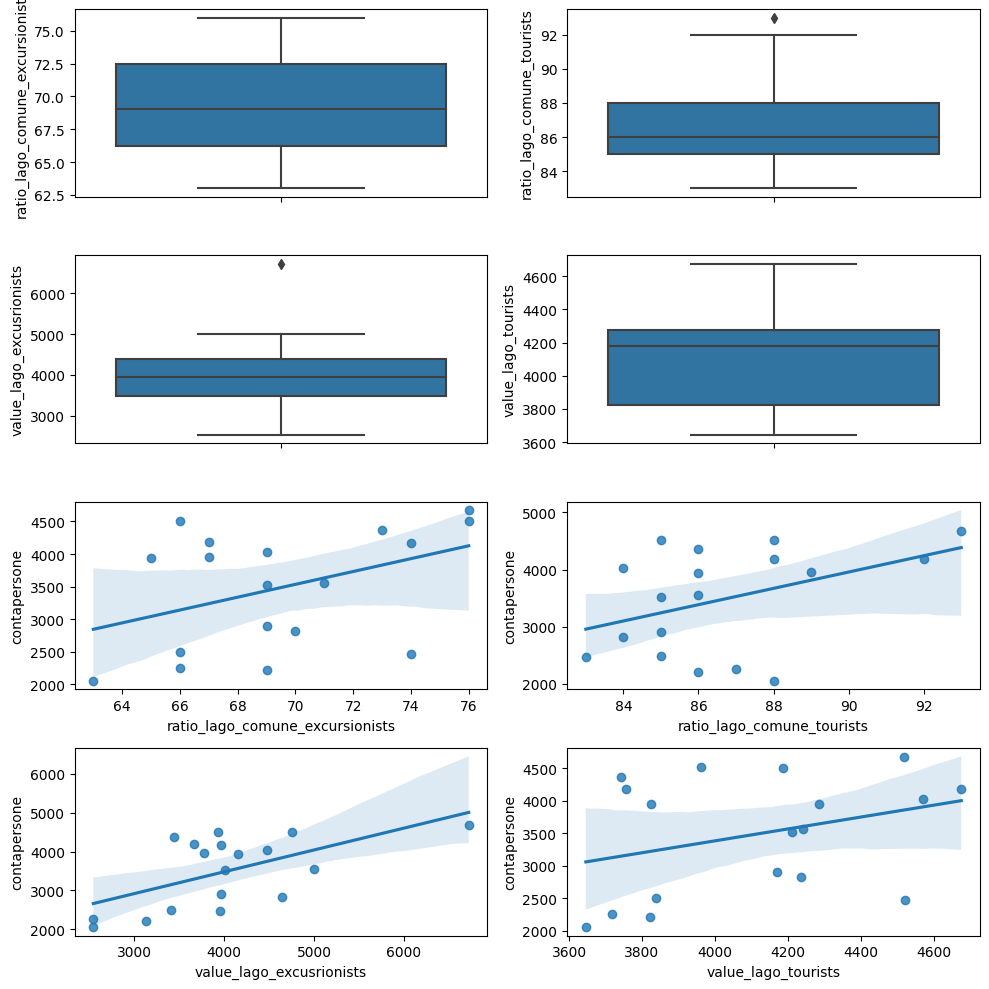

In [318]:
fig, axs = plt.subplots(ncols = 2, nrows = 4, figsize = (10, 10))
sns.boxplot(y=ferragosto_vod_contapersone_df["ratio_lago_comune_excursionists"], ax = axs[0, 0])
sns.boxplot(y=ferragosto_vod_contapersone_df["ratio_lago_comune_tourists"], ax = axs[0, 1])
sns.boxplot(y=ferragosto_vod_contapersone_df["value_lago_excusrionists"], ax = axs[1, 0])
sns.boxplot(y=ferragosto_vod_contapersone_df["value_lago_tourists"], ax = axs[1, 1])
sns.regplot(y = ferragosto_vod_contapersone_df['contapersone'], x = ferragosto_vod_contapersone_df['ratio_lago_comune_excursionists'], ax = axs[2, 0])
sns.regplot(y = ferragosto_vod_contapersone_df['contapersone'], x = ferragosto_vod_contapersone_df['ratio_lago_comune_tourists'], ax = axs[2, 1])
sns.regplot(y = ferragosto_vod_contapersone_df['contapersone'], x = ferragosto_vod_contapersone_df['value_lago_excusrionists'], ax = axs[3, 0])
sns.regplot(y = ferragosto_vod_contapersone_df['contapersone'], x = ferragosto_vod_contapersone_df['value_lago_tourists'], ax = axs[3, 1])
plt.tight_layout()

## Before Ferragosto Timeframe

In [319]:
before_ferragosto_vod_contapersone_df = vodafone_contapersone_df[(vodafone_contapersone_df["date"] >= "2023-07-20") & (vodafone_contapersone_df["date"] <= "2023-08-08")]
before_ferragosto_vod_contapersone_df

,date,ratio_lago_comune_excursionists,value_lago_excusrionists,ratio_lago_comune_tourists,value_lago_tourists,contapersone
5,2023-07-20,65,2038,84,3072,1337
6,2023-07-21,66,1313,85,3261,982
7,2023-07-22,63,2308,85,3772,1396
8,2023-07-23,67,3621,87,3737,2021
9,2023-07-24,55,1003,91,3265,746
10,2023-07-25,65,1294,89,2953,996
11,2023-07-26,55,2120,85,3035,2343
12,2023-07-27,56,2099,88,3095,2065
13,2023-07-28,61,2055,89,3322,1760
14,2023-07-29,59,2446,87,3833,2093


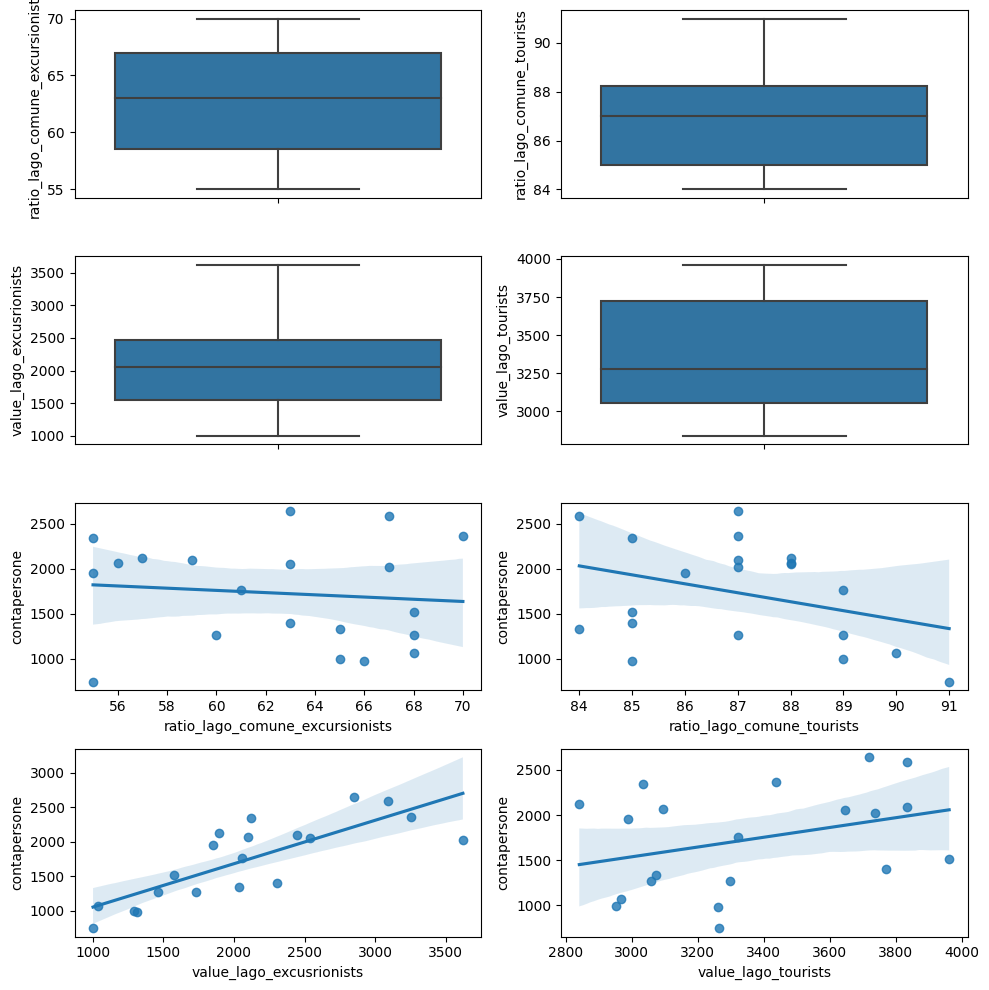

In [320]:
fig, axs = plt.subplots(ncols = 2, nrows = 4, figsize = (10, 10))
sns.boxplot(y=before_ferragosto_vod_contapersone_df["ratio_lago_comune_excursionists"], ax = axs[0, 0])
sns.boxplot(y=before_ferragosto_vod_contapersone_df["ratio_lago_comune_tourists"], ax = axs[0, 1])
sns.boxplot(y=before_ferragosto_vod_contapersone_df["value_lago_excusrionists"], ax = axs[1, 0])
sns.boxplot(y=before_ferragosto_vod_contapersone_df["value_lago_tourists"], ax = axs[1, 1])
sns.regplot(y = before_ferragosto_vod_contapersone_df['contapersone'], x = before_ferragosto_vod_contapersone_df['ratio_lago_comune_excursionists'], ax = axs[2, 0])
sns.regplot(y = before_ferragosto_vod_contapersone_df['contapersone'], x = before_ferragosto_vod_contapersone_df['ratio_lago_comune_tourists'], ax = axs[2, 1])
sns.regplot(y = before_ferragosto_vod_contapersone_df['contapersone'], x = before_ferragosto_vod_contapersone_df['value_lago_excusrionists'], ax = axs[3, 0])
sns.regplot(y = before_ferragosto_vod_contapersone_df['contapersone'], x = before_ferragosto_vod_contapersone_df['value_lago_tourists'], ax = axs[3, 1])
plt.tight_layout()

## After Ferragosto Timeframe

In [321]:
after_ferragosto_vod_contapersone_df = vodafone_contapersone_df[(vodafone_contapersone_df["date"] >= "2023-08-22") & (vodafone_contapersone_df["date"] <= "2023-09-01")]
after_ferragosto_vod_contapersone_df

,date,ratio_lago_comune_excursionists,value_lago_excusrionists,ratio_lago_comune_tourists,value_lago_tourists,contapersone
38,2023-08-22,67,3771,89,3825,3956
39,2023-08-23,67,3667,88,3756,4186
40,2023-08-24,69,3969,85,4170,2900
41,2023-08-25,73,3439,86,3743,4363
42,2023-08-26,69,2905,83,3882,3255
43,2023-08-27,80,1200,83,2960,2046
44,2023-08-28,74,671,84,2266,1367
45,2023-08-29,67,1051,86,2199,1227
46,2023-08-30,59,1481,86,2306,2341
47,2023-08-31,64,1284,86,2340,1805


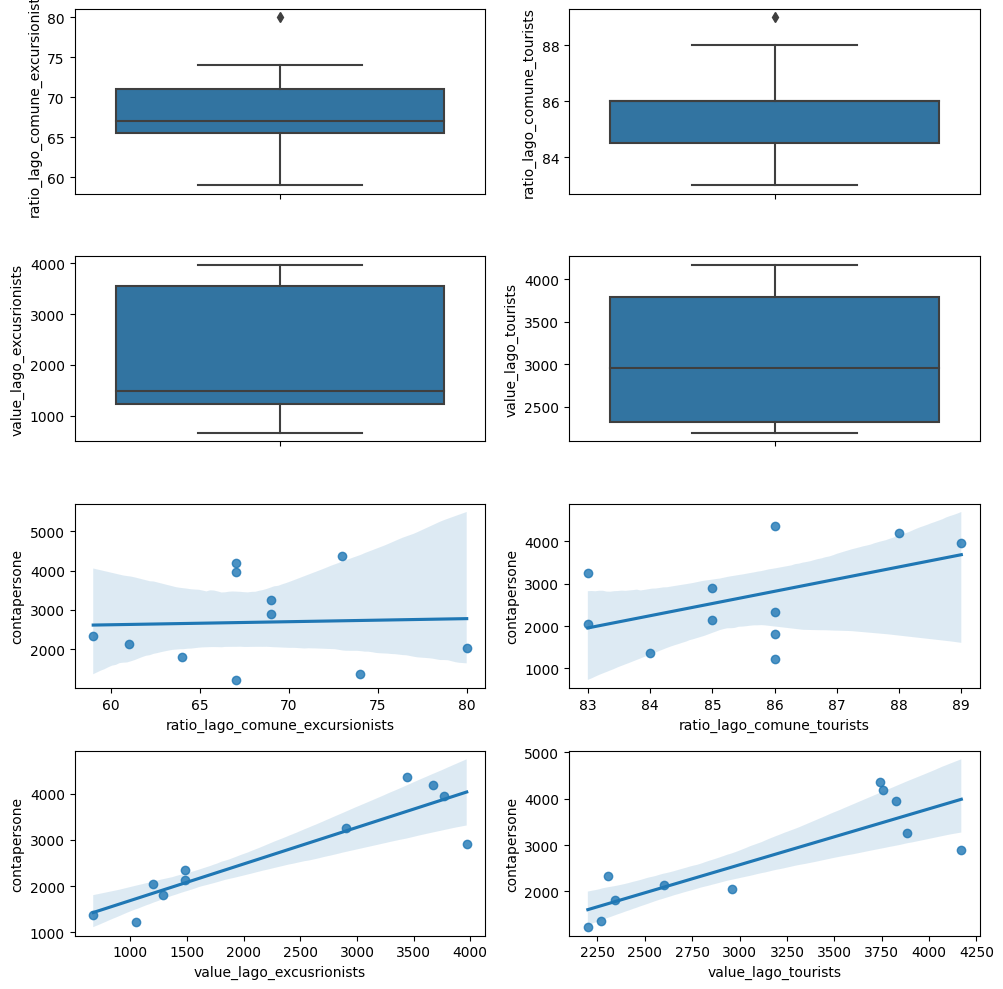

In [322]:
fig, axs = plt.subplots(ncols = 2, nrows = 4, figsize = (10, 10))
sns.boxplot(y=after_ferragosto_vod_contapersone_df["ratio_lago_comune_excursionists"], ax = axs[0, 0])
sns.boxplot(y=after_ferragosto_vod_contapersone_df["ratio_lago_comune_tourists"], ax = axs[0, 1])
sns.boxplot(y=after_ferragosto_vod_contapersone_df["value_lago_excusrionists"], ax = axs[1, 0])
sns.boxplot(y=after_ferragosto_vod_contapersone_df["value_lago_tourists"], ax = axs[1, 1])
sns.regplot(y = after_ferragosto_vod_contapersone_df['contapersone'], x = after_ferragosto_vod_contapersone_df['ratio_lago_comune_excursionists'], ax = axs[2, 0])
sns.regplot(y = after_ferragosto_vod_contapersone_df['contapersone'], x = after_ferragosto_vod_contapersone_df['ratio_lago_comune_tourists'], ax = axs[2, 1])
sns.regplot(y = after_ferragosto_vod_contapersone_df['contapersone'], x = after_ferragosto_vod_contapersone_df['value_lago_excusrionists'], ax = axs[3, 0])
sns.regplot(y = after_ferragosto_vod_contapersone_df['contapersone'], x = after_ferragosto_vod_contapersone_df['value_lago_tourists'], ax = axs[3, 1])
plt.tight_layout()

In [ ]:
presenze_lago

In [323]:
vodafone_contapersone_df

,date,ratio_lago_comune_excursionists,value_lago_excusrionists,ratio_lago_comune_tourists,value_lago_tourists,contapersone
0,2023-07-15,67,3636,82,3833,1496
1,2023-07-16,72,4756,84,3660,2143
2,2023-07-17,66,2818,83,3149,1663
3,2023-07-18,65,2518,83,3049,1518
4,2023-07-19,65,1871,84,3015,1345
...,...,...,...,...,...,...
65,2023-09-18,96,593,78,1085,1081
66,2023-09-19,58,737,81,1281,1468
67,2023-09-20,73,830,78,1384,1699
68,2023-09-21,76,850,78,1678,2382


## Linear Regression

In [520]:
# Step 1: Train test split
from sklearn.model_selection import train_test_split

X = vodafone_contapersone_df.iloc[:, 1: -1].values
y = vodafone_contapersone_df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [521]:
# Step 2: Standardisation
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [522]:
# Step 3: Apply PCA transformation
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

explained_variance = pca.explained_variance_ratio_

In [523]:
pca.components_

array([[ 0.05123019,  0.61079125,  0.54836096,  0.5688671 ],
       [ 0.98373588,  0.03522586, -0.17173198,  0.03912774]])

In [524]:
explained_variance

array([0.63379513, 0.25419598])

In [525]:
# Step 4: Fitting Linear Regression To the training set
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression() 
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [526]:
# prints y-intercept
print(linear_regressor.intercept_)
# prints the coefficient
print(linear_regressor.coef_)

2135.1964285714284
[415.23060868 302.26448175]


In [527]:
y_test

array([2213, 2495, 2132, 2586, 3560, 2597, 1396, 1282, 3944, 1030, 3491,
       2469, 4676, 3255])

In [528]:
y_pred = linear_regressor.predict(X_test)

In [529]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

869.292571154866

# Compare the ratio of visitors on the beach to the visitors in Molveno + Andalo

In [334]:
# presences in Andalo
vod_presences_andalo = grouped_vodafone_presences[grouped_vodafone_presences["locId"] == LOC_ID_COMUNE_ANDALO]
vod_presences_andalo["date"] = pd.to_datetime(vod_presences_andalo["date"])
vod_presences_andalo


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,date,locId,userProfile,value
219,2022-01-01,166,COMMUTER,314
220,2022-01-01,166,INHABITANT,1066
221,2022-01-01,166,TOURIST,10564
222,2022-01-01,166,VISITOR,5871
797,2022-01-02,166,COMMUTER,308
...,...,...,...,...
477765,2024-03-30,166,VISITOR,1377
478347,2024-03-31,166,COMMUTER,192
478348,2024-03-31,166,INHABITANT,858
478349,2024-03-31,166,TOURIST,2242


In [374]:
attendance_molveno_andalo_lago = merged_presences_molveno_lago.merge(vod_presences_andalo, on=["date", "userProfile"]).rename(columns={"locId": "locId_andalo", "value": "value_andalo"})
attendance_molveno_andalo_lago = attendance_molveno_andalo_lago.merge(contapersone[["date", "contapersone", "contapersone_scaled"]], on=["date"])
attendance_molveno_andalo_lago

,date,locId_molveno,userProfile,value_molveno,locId_lago,value_lago,ratio_lago_comune,locId_andalo,value_andalo,contapersone,contapersone_scaled
0,2023-07-15,27,TOURIST,4635,LAGO_MOLV,3833,82,166,5587,1496,0.190840
1,2023-07-15,27,VISITOR,5396,LAGO_MOLV,3636,67,166,2743,1496,0.190840
2,2023-07-16,27,TOURIST,4357,LAGO_MOLV,3660,84,166,6036,2143,0.355471
3,2023-07-16,27,VISITOR,6592,LAGO_MOLV,4756,72,166,3143,2143,0.355471
4,2023-07-17,27,TOURIST,3775,LAGO_MOLV,3149,83,166,4670,1663,0.233333
...,...,...,...,...,...,...,...,...,...,...,...
135,2023-09-20,27,VISITOR,1126,LAGO_MOLV,830,73,166,751,1699,0.242494
136,2023-09-21,27,TOURIST,2129,LAGO_MOLV,1678,78,166,598,2382,0.416285
137,2023-09-21,27,VISITOR,1109,LAGO_MOLV,850,76,166,1223,2382,0.416285
138,2023-09-22,27,TOURIST,2550,LAGO_MOLV,2015,79,166,770,1030,0.072265


In [375]:
attendance_molveno_andalo_lago["ratio_lago_MolvenoAndalo"] = (attendance_molveno_andalo_lago["value_lago"] / (attendance_molveno_andalo_lago["value_molveno"] + attendance_molveno_andalo_lago["value_andalo"]) ) * 100  
# TODO
attendance_molveno_andalo_lago["ratio_lago_MolvenoAndalo"] = attendance_molveno_andalo_lago["ratio_lago_MolvenoAndalo"].replace(np.inf, 0).fillna(0)
attendance_molveno_andalo_lago["ratio_lago_MolvenoAndalo"] = attendance_molveno_andalo_lago["ratio_lago_MolvenoAndalo"].apply(lambda el: int(el))
attendance_molveno_andalo_lago.sort_values(by=["ratio_lago_MolvenoAndalo"], ascending=False)

,date,locId_molveno,userProfile,value_molveno,locId_lago,value_lago,ratio_lago_comune,locId_andalo,value_andalo,contapersone,contapersone_scaled,ratio_lago_MolvenoAndalo
136,2023-09-21,27,TOURIST,2129,LAGO_MOLV,1678,78,166,598,2382,0.416285,61
138,2023-09-22,27,TOURIST,2550,LAGO_MOLV,2015,79,166,770,1030,0.072265,60
130,2023-09-18,27,TOURIST,1377,LAGO_MOLV,1085,78,166,439,1081,0.085242,59
134,2023-09-20,27,TOURIST,1768,LAGO_MOLV,1384,78,166,607,1699,0.242494,58
63,2023-08-15,27,VISITOR,8808,LAGO_MOLV,6723,76,166,3867,4676,1.000000,53
...,...,...,...,...,...,...,...,...,...,...,...,...
105,2023-09-05,27,VISITOR,1666,LAGO_MOLV,980,58,166,1407,1529,0.199237,31
35,2023-08-01,27,VISITOR,1522,LAGO_MOLV,1041,68,166,1896,1069,0.082188,30
103,2023-09-04,27,VISITOR,892,LAGO_MOLV,663,74,166,1318,2597,0.470992,30
89,2023-08-28,27,VISITOR,900,LAGO_MOLV,671,74,166,1333,1367,0.158015,30


<Axes: xlabel='date'>

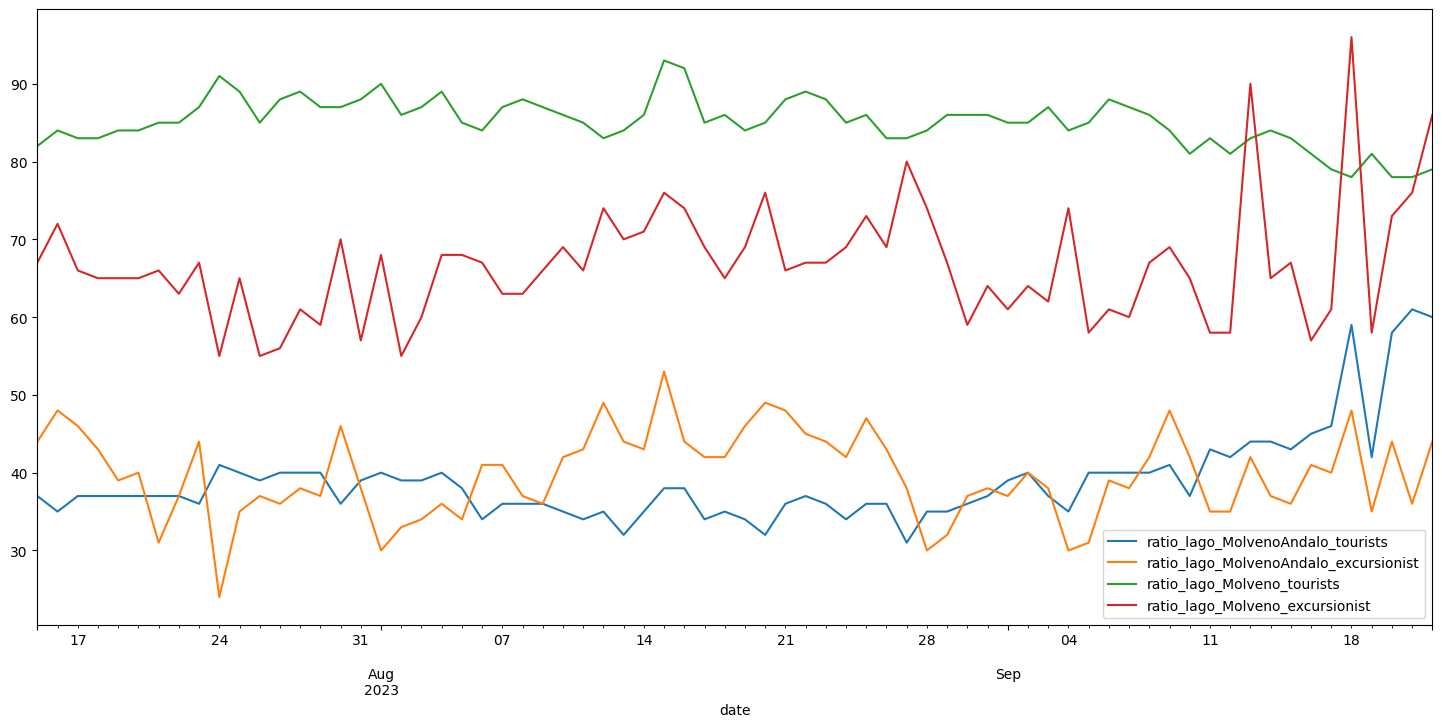

In [337]:
# Ratio of visitors of lago to visitors in Molveno+Andalo
ax = attendance_molveno_andalo_lago[attendance_molveno_andalo_lago["userProfile"] == "TOURIST"].plot(x="date", y="ratio_lago_MolvenoAndalo", label="ratio_lago_MolvenoAndalo_tourists", figsize=(18, 8))
attendance_molveno_andalo_lago[attendance_molveno_andalo_lago["userProfile"] == "VISITOR"].plot(ax=ax, x="date", y="ratio_lago_MolvenoAndalo", label="ratio_lago_MolvenoAndalo_excursionist", figsize=(18, 8))

# Ratio of visitors of lago to visitors in Molveno
merged_presences_molveno_lago[merged_presences_molveno_lago["userProfile"] == "TOURIST"].plot(ax=ax, x="date", y="ratio_lago_comune", label="ratio_lago_Molveno_tourists", figsize=(18, 8))
merged_presences_molveno_lago[merged_presences_molveno_lago["userProfile"] == "VISITOR"].plot(ax=ax, x="date", y="ratio_lago_comune", label="ratio_lago_Molveno_excursionist", figsize=(18, 8))

## Interpretation 1: The rate of Molveno's tourists that visit lago is the highest  

In [359]:
tourists_MolvenoAndalo_scaled

,date,locId_molveno,userProfile,value_molveno,locId_lago,value_lago,ratio_lago_comune,locId_andalo,value_andalo,ratio_lago_MolvenoAndalo
0,2023-07-15,27,TOURIST,0.803056,LAGO_MOLV,3833,82,166,5587,37
2,2023-07-16,27,TOURIST,0.734533,LAGO_MOLV,3660,84,166,6036,35
4,2023-07-17,27,TOURIST,0.591077,LAGO_MOLV,3149,83,166,4670,37
6,2023-07-18,27,TOURIST,0.563717,LAGO_MOLV,3049,83,166,4525,37
8,2023-07-19,27,TOURIST,0.535617,LAGO_MOLV,3015,84,166,4493,37
...,...,...,...,...,...,...,...,...,...,...
130,2023-09-18,27,TOURIST,0.000000,LAGO_MOLV,1085,78,166,439,59
132,2023-09-19,27,TOURIST,0.049790,LAGO_MOLV,1281,81,166,1469,42
134,2023-09-20,27,TOURIST,0.096377,LAGO_MOLV,1384,78,166,607,58
136,2023-09-21,27,TOURIST,0.185359,LAGO_MOLV,1678,78,166,598,61


## Split tourists and excursionists

In [376]:
tourists_MolvenoAndalo = attendance_molveno_andalo_lago[attendance_molveno_andalo_lago["userProfile"] == "TOURIST"]
excursionist_MolvenoAndalo = attendance_molveno_andalo_lago[attendance_molveno_andalo_lago["userProfile"] == "VISITOR"]

In [378]:
# prepare the dataset for training
# scale values separately, before merging
tourists_MolvenoAndalo_scaled = tourists_MolvenoAndalo.copy()
excursionist_MolvenoAndalo_scaled = excursionist_MolvenoAndalo.copy()
for col in ["value_molveno", "value_lago", "ratio_lago_comune", "value_andalo", "ratio_lago_MolvenoAndalo"]:
    tourists_MolvenoAndalo_scaled[col] = scaler.fit_transform(tourists_MolvenoAndalo[[col]])
    excursionist_MolvenoAndalo_scaled[col] = scaler.fit_transform(excursionist_MolvenoAndalo[[col]])
excursionist_MolvenoAndalo_scaled = excursionist_MolvenoAndalo_scaled[["date", "value_molveno", "value_lago", "ratio_lago_comune", "value_andalo", "ratio_lago_MolvenoAndalo", "contapersone_scaled"]]
tourists_MolvenoAndalo_scaled = tourists_MolvenoAndalo_scaled[["date", "value_molveno", "value_lago", "ratio_lago_comune", "value_andalo", "ratio_lago_MolvenoAndalo", "contapersone_scaled"]]
excursionist_MolvenoAndalo_scaled

,date,value_molveno,value_lago,ratio_lago_comune,value_andalo,ratio_lago_MolvenoAndalo,contapersone_scaled
1,2023-07-15,0.583445,0.499026,0.292683,0.554176,0.689655,0.190840
3,2023-07-16,0.729459,0.680785,0.414634,0.657616,0.827586,0.355471
5,2023-07-17,0.444390,0.366277,0.268293,0.325058,0.758621,0.233333
7,2023-07-18,0.391894,0.317592,0.243902,0.339540,0.655172,0.196438
9,2023-07-19,0.275791,0.212593,0.243902,0.331006,0.517241,0.152417
...,...,...,...,...,...,...,...
131,2023-09-18,0.000000,0.005193,1.000000,0.000000,0.827586,0.085242
133,2023-09-19,0.077646,0.028562,0.073171,0.059478,0.379310,0.183715
135,2023-09-20,0.062141,0.043655,0.439024,0.039048,0.689655,0.242494
137,2023-09-21,0.060066,0.046900,0.512195,0.161107,0.413793,0.416285


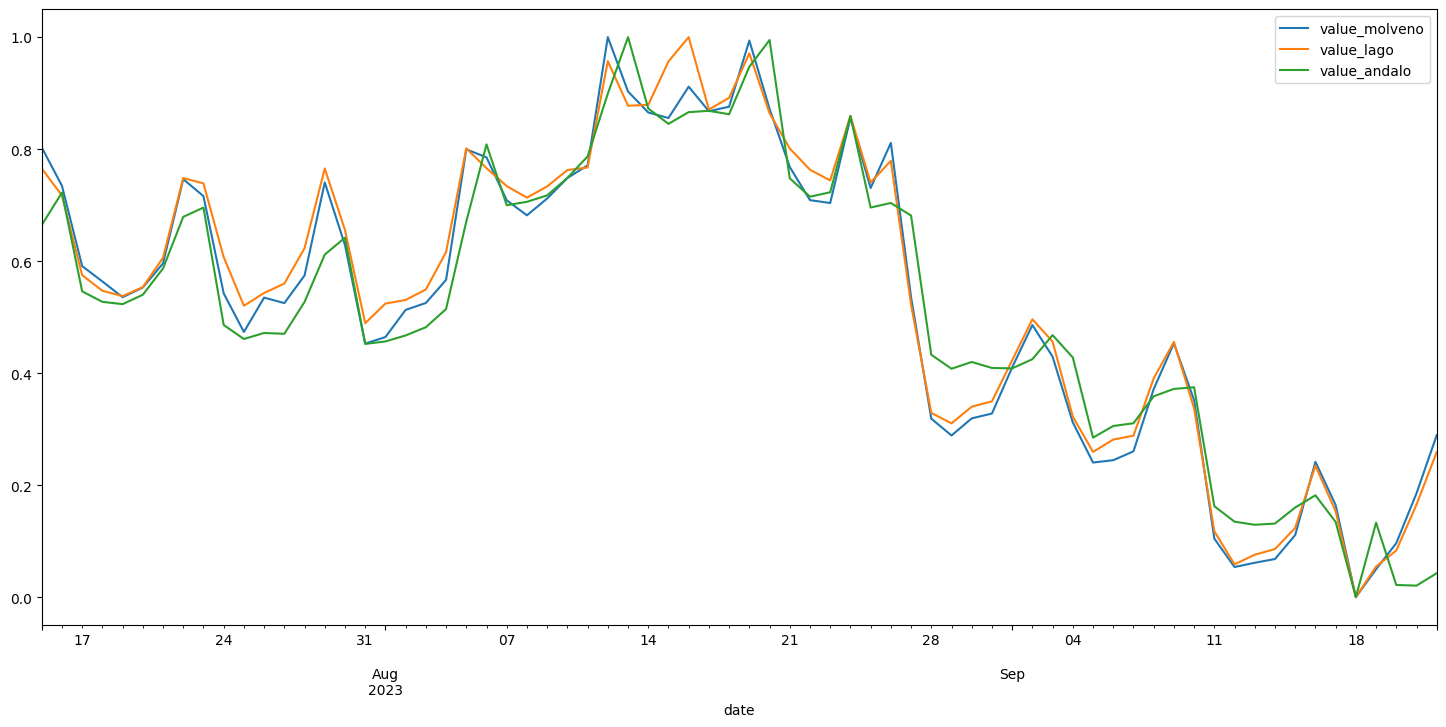

In [574]:
ax = tourists_MolvenoAndalo_scaled.plot(x="date", y=["value_molveno","value_lago", "value_andalo"], figsize=(18, 8))


<Axes: xlabel='date'>

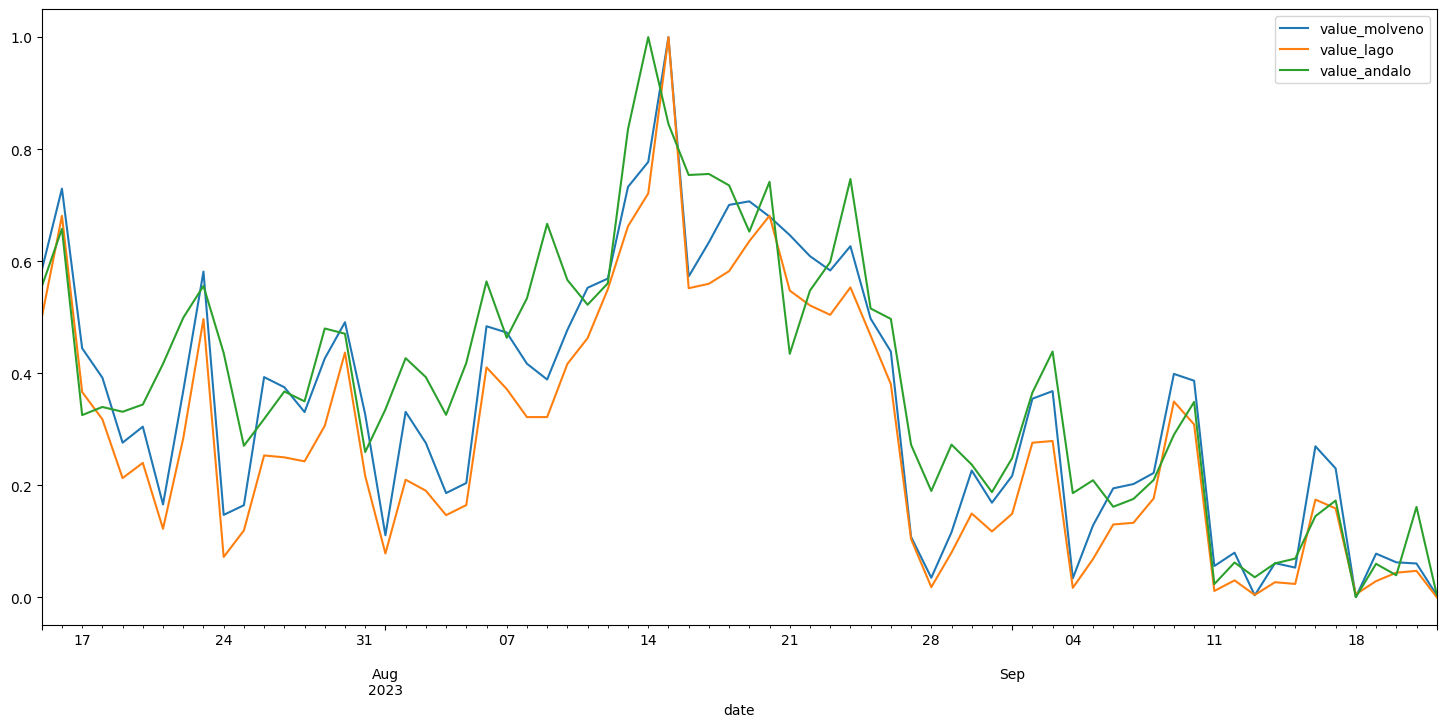

In [575]:
excursionist_MolvenoAndalo_scaled.plot(x="date", y=["value_molveno","value_lago", "value_andalo"], figsize=(18, 8))

In [381]:
visitors_lago_MolvenoAndalo_scaled = excursionist_MolvenoAndalo_scaled.merge(tourists_MolvenoAndalo_scaled, on="date", suffixes=["_excursionists", "_tourists"])
visitors_lago_MolvenoAndalo_scaled

,date,value_molveno_excursionists,value_lago_excursionists,ratio_lago_comune_excursionists,value_andalo_excursionists,ratio_lago_MolvenoAndalo_excursionists,contapersone_scaled_excursionists,value_molveno_tourists,value_lago_tourists,ratio_lago_comune_tourists,value_andalo_tourists,ratio_lago_MolvenoAndalo_tourists,contapersone_scaled_tourists
0,2023-07-15,0.583445,0.499026,0.292683,0.554176,0.689655,0.190840,0.803056,0.765460,0.266667,0.664344,0.200000,0.190840
1,2023-07-16,0.729459,0.680785,0.414634,0.657616,0.827586,0.355471,0.734533,0.717270,0.400000,0.722287,0.133333,0.355471
2,2023-07-17,0.444390,0.366277,0.268293,0.325058,0.758621,0.233333,0.591077,0.574930,0.333333,0.546006,0.200000,0.233333
3,2023-07-18,0.391894,0.317592,0.243902,0.339540,0.655172,0.196438,0.563717,0.547075,0.333333,0.527294,0.200000,0.196438
4,2023-07-19,0.275791,0.212593,0.243902,0.331006,0.517241,0.152417,0.535617,0.537604,0.400000,0.523164,0.200000,0.152417
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,2023-09-18,0.000000,0.005193,1.000000,0.000000,0.827586,0.085242,0.000000,0.000000,0.000000,0.000000,0.933333,0.085242
66,2023-09-19,0.077646,0.028562,0.073171,0.059478,0.379310,0.183715,0.049790,0.054596,0.200000,0.132920,0.366667,0.183715
67,2023-09-20,0.062141,0.043655,0.439024,0.039048,0.689655,0.242494,0.096377,0.083287,0.000000,0.021680,0.900000,0.242494
68,2023-09-21,0.060066,0.046900,0.512195,0.161107,0.413793,0.416285,0.185359,0.165181,0.000000,0.020519,1.000000,0.416285


## Linear regression

In [1251]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [1252]:
tourists_MolvenoAndalo

,date,locId_molveno,userProfile,value_molveno,locId_lago,value_lago,ratio_lago_comune,locId_andalo,value_andalo,contapersone,contapersone_scaled,ratio_lago_MolvenoAndalo
0,2023-07-15,27,TOURIST,4635,LAGO_MOLV,3833,82,166,5587,1496,0.190840,37
2,2023-07-16,27,TOURIST,4357,LAGO_MOLV,3660,84,166,6036,2143,0.355471,35
4,2023-07-17,27,TOURIST,3775,LAGO_MOLV,3149,83,166,4670,1663,0.233333,37
6,2023-07-18,27,TOURIST,3664,LAGO_MOLV,3049,83,166,4525,1518,0.196438,37
8,2023-07-19,27,TOURIST,3550,LAGO_MOLV,3015,84,166,4493,1345,0.152417,37
...,...,...,...,...,...,...,...,...,...,...,...,...
130,2023-09-18,27,TOURIST,1377,LAGO_MOLV,1085,78,166,439,1081,0.085242,59
132,2023-09-19,27,TOURIST,1579,LAGO_MOLV,1281,81,166,1469,1468,0.183715,42
134,2023-09-20,27,TOURIST,1768,LAGO_MOLV,1384,78,166,607,1699,0.242494,58
136,2023-09-21,27,TOURIST,2129,LAGO_MOLV,1678,78,166,598,2382,0.416285,61


In [937]:
columns = ["date", "value_molveno", "value_lago", "value_andalo", "contapersone"]
visitors_lago_MolvenoAndalo = excursionist_MolvenoAndalo[columns].merge(tourists_MolvenoAndalo[columns], on=["date", "contapersone"], suffixes=["_excursionists", "_tourists"])
visitors_lago_MolvenoAndalo

,date,value_molveno_excursionists,value_lago_excursionists,value_andalo_excursionists,contapersone,value_molveno_tourists,value_lago_tourists,value_andalo_tourists
0,2023-07-15,5396,3636,2743,1496,4635,3833,5587
1,2023-07-16,6592,4756,3143,2143,4357,3660,6036
2,2023-07-17,4257,2818,1857,1663,3775,3149,4670
3,2023-07-18,3827,2518,1913,1518,3664,3049,4525
4,2023-07-19,2876,1871,1880,1345,3550,3015,4493
...,...,...,...,...,...,...,...,...
65,2023-09-18,617,593,600,1081,1377,1085,439
66,2023-09-19,1253,737,830,1468,1579,1281,1469
67,2023-09-20,1126,830,751,1699,1768,1384,607
68,2023-09-21,1109,850,1223,2382,2129,1678,598


<Axes: >

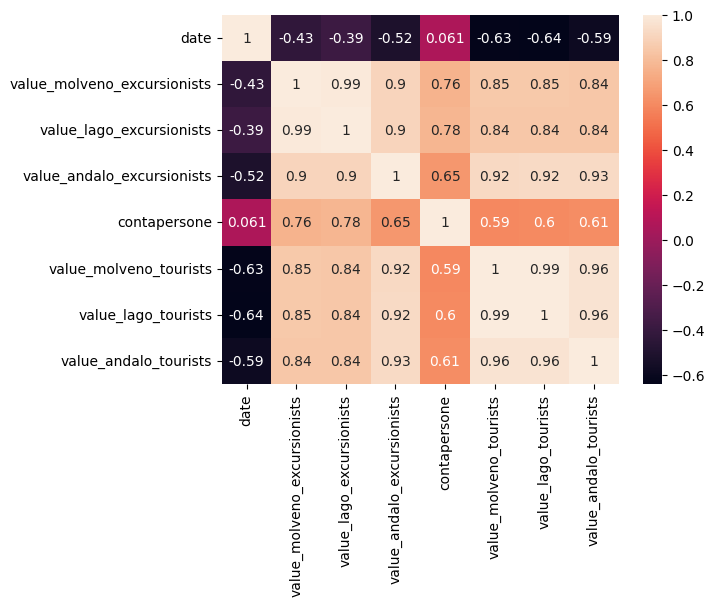

In [938]:
sns.heatmap(visitors_lago_MolvenoAndalo.corr(), annot=True)


In [939]:
features = list(visitors_lago_MolvenoAndalo.columns)
features.remove("date")
features.remove("contapersone")
features = list(filter(lambda el: not el.startswith("ratio"), features))
features

['value_molveno_excursionists',
 'value_lago_excursionists',
 'value_andalo_excursionists',
 'value_molveno_tourists',
 'value_lago_tourists',
 'value_andalo_tourists']

In [940]:
# Step 1: Train test split
X = visitors_lago_MolvenoAndalo.loc[:, features].values
y = visitors_lago_MolvenoAndalo.loc[:, "contapersone"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [941]:
# Step 2: Standardisation
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [942]:
# Step 3: Apply PCA transformation
pca = PCA(n_components=2)

X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.91660394, 0.06012646])

In [943]:
# Step 4: Fitting Linear Regression To the training set
linear_regressor = LinearRegression() 
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [944]:
# prints y-intercept
print(linear_regressor.intercept_)
# prints the coefficient
print(linear_regressor.coef_)

2135.1964285714284
[285.649785   599.83463999]


In [945]:
y_pred = linear_regressor.predict(X_test) # make predictions

In [946]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

781.5926609579668

In [947]:
def create_regressor(training_data):
    # Step 1: Train test split
    X = training_data
    y = visitors_lago_MolvenoAndalo.loc[:, "contapersone"].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    # Step 2: Standardisation
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.fit_transform(X_test)
    # Step 4: Fitting Linear Regression To the training set
    linear_regressor = LinearRegression() 
    linear_regressor.fit(X_train, y_train)
    y_pred = linear_regressor.predict(X_test) # make predictions
    
    rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    plt.plot(X_test, y_test,'rx')
    plt.plot(X_test, y_pred, color='black')
    plt.title(col)
    plt.grid()
    plt.show()
    return {"mae": mae, "rmse": rmse, "r2": r2, "coefficients": linear_regressor.coef_}
    

### Summarize the reggressors

In [948]:
features

['value_molveno_excursionists',
 'value_lago_excursionists',
 'value_andalo_excursionists',
 'value_molveno_tourists',
 'value_lago_tourists',
 'value_andalo_tourists']

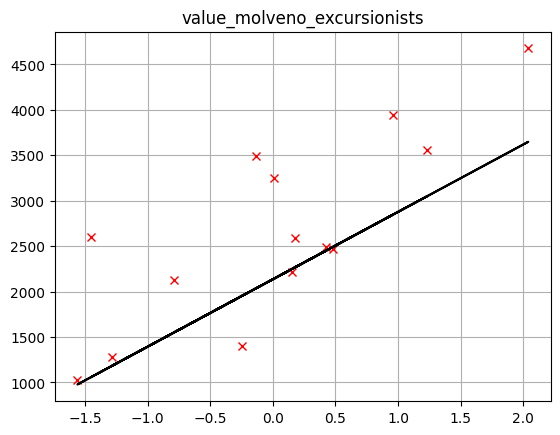

{'mae': 604.6002542068337, 'rmse': 802.6206585600303, 'r2': 0.3680682973552848, 'coefficients': array([741.32427099]), 'feature': 'value_molveno_excursionists'}


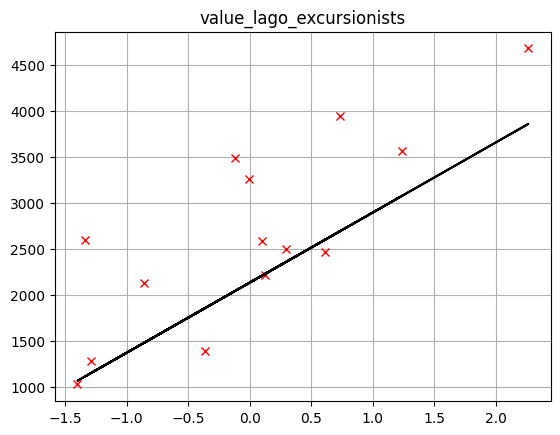

{'mae': 610.2838829248306, 'rmse': 795.0397659467811, 'r2': 0.3799493329800506, 'coefficients': array([760.42833378]), 'feature': 'value_lago_excursionists'}


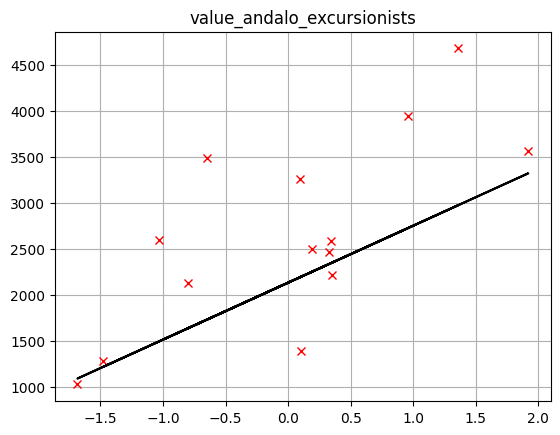

{'mae': 660.3687985244586, 'rmse': 882.3703254023858, 'r2': 0.23624992805219314, 'coefficients': array([618.12361965]), 'feature': 'value_andalo_excursionists'}


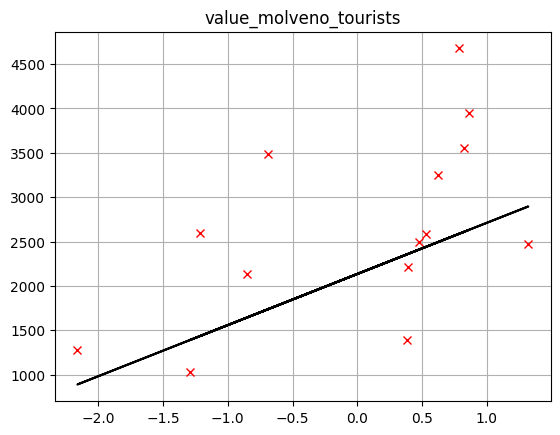

{'mae': 787.6434731649996, 'rmse': 987.4942562731492, 'r2': 0.043425867853660316, 'coefficients': array([576.54370622]), 'feature': 'value_molveno_tourists'}


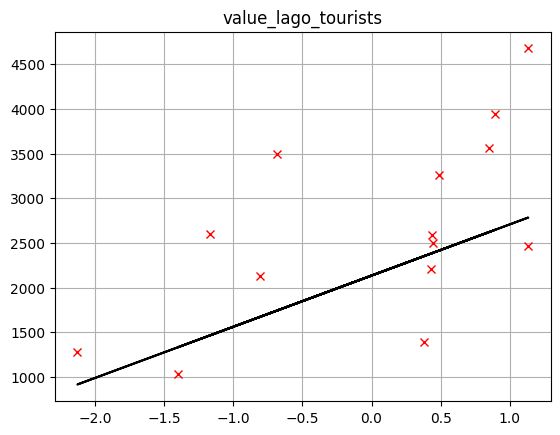

{'mae': 765.408065660628, 'rmse': 952.8459953159455, 'r2': 0.10937495836058264, 'coefficients': array([573.17020245]), 'feature': 'value_lago_tourists'}


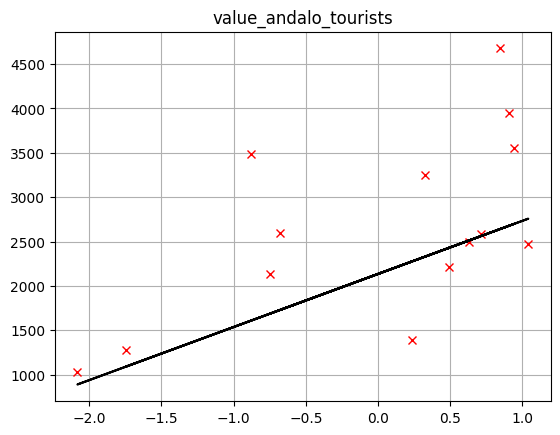

{'mae': 717.4426671238244, 'rmse': 956.2773977670764, 'r2': 0.10294874512463126, 'coefficients': array([598.40856127]), 'feature': 'value_andalo_tourists'}


,feature,mae,rmse,r2,coefficients
0,value_molveno_excursionists,604.600254,802.620659,0.368068,[741.3242709861298]
1,value_lago_excursionists,610.283883,795.039766,0.379949,[760.4283337755293]
2,value_andalo_excursionists,660.368799,882.370325,0.236250,[618.1236196492058]
5,value_andalo_tourists,717.442667,956.277398,0.102949,[598.4085612682666]
4,value_lago_tourists,765.408066,952.845995,0.109375,[573.1702024455282]
3,value_molveno_tourists,787.643473,987.494256,0.043426,[576.5437062205101]


In [949]:
data = []
for col in features:
    training_data = visitors_lago_MolvenoAndalo.loc[:, [col]].values
    metrics = create_regressor(training_data)
    metrics["feature"] = col
    data.append(metrics)
    print(metrics)
results = pd.DataFrame(columns=["feature", "mae", "rmse", "r2", "coefficients"], data = data)
results.sort_values(by="mae", ascending=True)

In [950]:
results.sort_values(by="rmse", ascending=True)

,feature,mae,rmse,r2,coefficients
1,value_lago_excursionists,610.283883,795.039766,0.379949,[760.4283337755293]
0,value_molveno_excursionists,604.600254,802.620659,0.368068,[741.3242709861298]
2,value_andalo_excursionists,660.368799,882.370325,0.236250,[618.1236196492058]
4,value_lago_tourists,765.408066,952.845995,0.109375,[573.1702024455282]
5,value_andalo_tourists,717.442667,956.277398,0.102949,[598.4085612682666]
3,value_molveno_tourists,787.643473,987.494256,0.043426,[576.5437062205101]


## Model Evaluation - Regression metrics

## Cross validation

## Hyperparameter tuning

# Factors that may affect attendances at spiaggia

## Events


In [42]:
manifestazioni_df2 = manifestazioni_df[(manifestazioni_df["nr"] != "0") & (manifestazioni_df["nr"] != "0.0")]
manifestazioni_df2

,nr,richiedente,manifestazione,luogo,data_manifestazione_inizio,data_manifestazione_fine,partecipanti_dichiarati,spesa,spesa_ritenuta_ammissibile,doc_tm_sra_200000,punti,percentuale_intervento,contributo,typology
0,7,Apaloosa Advertising s.r.l.,Week 4 Kids,Andalo-M.Baldo-Folgarida-Campiglio-Castrozza,2023-03-12 00:00:00,2023-03-18 00:00:00,5000,80000,80000,non serve,52.0,0.1,8000,2023_first_part
1,16,Centro Sportivo Italiano Presidenza Nazionale,XXIV Campionato Nazionale CSI di Sci,Andalo,2023-03-16 00:00:00,2023-03-19 00:00:00,750,70000,70000,non serve,67.0,0.15,10500,2023_first_part
2,37,Royal Academy of Dance srl,Scuola Estiva Internazionale Royal Academy of ...,Altopiano Paganella,2023-06-26 00:00:00,2023-07-08 00:00:00,1500,184000,184000,non serve,60.0,0.1,18400,2023_first_part
3,61,A.S.D. PowerStage,2° Dolomiti Brenta Rally,Andalo,2023-04-21 00:00:00,2023-04-22 00:00:00,3000,95000,95000,non serve,42.0,0.1,9500,2023_first_part
5,69,X-Tribe società sportiva dilettantistica a res...,Xterra World Championship 2023 Molveno Trentin...,Molveno -Andalo,2023-09-21 00:00:00,2023-09-24 00:00:00,3500,500000,500000,si,65.5,0.35,175000,2023_first_part
8,14.0,Gruppo Ciclistico Zambana,Criterium Gruppo Ciclistico Zambana,Paganella,2023-07-05 00:00:00,2023-08-20 00:00:00,20000.0,10100.0,10100.0,non serve,43.5,0.1,1010,2023_second_part
9,23.0,Molveno Holiday Scarl,XTERRA Dolomiti di Brenta Trail,Molveno,2023-09-09 00:00:00,2023-09-09 00:00:00,2300.0,60000.0,60000.0,non serve,67.0,0.15,9000,2023_second_part
10,37.0,Consorzio Fai Attività Iniziative e Vacanze In...,Orme-Festival dei sentieri sesta edizione,Fai della Paganella,2023-09-08 00:00:00,2023-09-10 00:00:00,3500.0,65000.0,65000.0,non serve,54.0,0.1,6500,2023_second_part
12,7,Apaloosa Advertising s.r.l.,Week 4 Kids,Andalo-M.Baldo-Folgarida-Campiglio-Castrozza,2024-01-27 00:00:00,2024-03-16 00:00:00,6000,96000.0,96000.0,non serve,52,0.1,9600,2024_first_part
13,29,Trentino Mountain Bike Associazione Sportiva D...,15° Circuito Trentino MTB,0,2024-06-09 00:00:00,2024-10-30 00:00:00,25000,62000.0,62000.0,non serve,80.5,0.15,9300,2024_first_part


In [43]:
manifestazioni_df2["data_manifestazione_inizio"] = pd.to_datetime(manifestazioni_df2["data_manifestazione_inizio"])
manifestazioni_df2["data_manifestazione_fine"] = pd.to_datetime(manifestazioni_df2["data_manifestazione_fine"])


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [44]:
eventi = pd.DataFrame(columns=["event_name", "date", "organizer", "location", "tot_participants", "participants"])
manifestazioni_df2["partecipanti_dichiarati"] = manifestazioni_df2["partecipanti_dichiarati"].astype(float).astype(int)
manifestazioni_filtered_df = manifestazioni_df2[manifestazioni_df2["data_manifestazione_inizio"] < "2024-01-27 00:00:00"]
manifestazioni_filtered_df


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,nr,richiedente,manifestazione,luogo,data_manifestazione_inizio,data_manifestazione_fine,partecipanti_dichiarati,spesa,spesa_ritenuta_ammissibile,doc_tm_sra_200000,punti,percentuale_intervento,contributo,typology
0,7,Apaloosa Advertising s.r.l.,Week 4 Kids,Andalo-M.Baldo-Folgarida-Campiglio-Castrozza,2023-03-12,2023-03-18,5000,80000,80000,non serve,52.0,0.1,8000,2023_first_part
1,16,Centro Sportivo Italiano Presidenza Nazionale,XXIV Campionato Nazionale CSI di Sci,Andalo,2023-03-16,2023-03-19,750,70000,70000,non serve,67.0,0.15,10500,2023_first_part
2,37,Royal Academy of Dance srl,Scuola Estiva Internazionale Royal Academy of ...,Altopiano Paganella,2023-06-26,2023-07-08,1500,184000,184000,non serve,60.0,0.1,18400,2023_first_part
3,61,A.S.D. PowerStage,2° Dolomiti Brenta Rally,Andalo,2023-04-21,2023-04-22,3000,95000,95000,non serve,42.0,0.1,9500,2023_first_part
5,69,X-Tribe società sportiva dilettantistica a res...,Xterra World Championship 2023 Molveno Trentin...,Molveno -Andalo,2023-09-21,2023-09-24,3500,500000,500000,si,65.5,0.35,175000,2023_first_part
8,14.0,Gruppo Ciclistico Zambana,Criterium Gruppo Ciclistico Zambana,Paganella,2023-07-05,2023-08-20,20000,10100.0,10100.0,non serve,43.5,0.1,1010,2023_second_part
9,23.0,Molveno Holiday Scarl,XTERRA Dolomiti di Brenta Trail,Molveno,2023-09-09,2023-09-09,2300,60000.0,60000.0,non serve,67.0,0.15,9000,2023_second_part
10,37.0,Consorzio Fai Attività Iniziative e Vacanze In...,Orme-Festival dei sentieri sesta edizione,Fai della Paganella,2023-09-08,2023-09-10,3500,65000.0,65000.0,non serve,54.0,0.1,6500,2023_second_part


In [45]:
D = "D"
for event in manifestazioni_filtered_df.itertuples():
    start_date = event.data_manifestazione_inizio
    end_date = event.data_manifestazione_fine
    organizer = event.richiedente
    event_name = event.manifestazione
    location = event.luogo
    participants = int(event.partecipanti_dichiarati)
    random_participants = 0
    if participants > 0:
        date_list = pd.date_range(start_date, end_date, freq=D)       
        mean_nr = participants/len(date_list)
        for date in date_list:
            random_participants = np.random.randint(0, mean_nr)            
            row = {"event_name": event_name, "date": date , "organizer": organizer, "location": location, "tot_participants": participants, "participants": random_participants}
            eventi.loc[len(eventi)] = row
eventi = eventi[(eventi["date"] >= START_DATE) & (eventi["date"] < END_DATE)]
eventi

,event_name,date,organizer,location,tot_participants,participants
16,Scuola Estiva Internazionale Royal Academy of ...,2023-07-01,Royal Academy of Dance srl,Altopiano Paganella,1500,100
17,Scuola Estiva Internazionale Royal Academy of ...,2023-07-02,Royal Academy of Dance srl,Altopiano Paganella,1500,21
18,Scuola Estiva Internazionale Royal Academy of ...,2023-07-03,Royal Academy of Dance srl,Altopiano Paganella,1500,46
19,Scuola Estiva Internazionale Royal Academy of ...,2023-07-04,Royal Academy of Dance srl,Altopiano Paganella,1500,0
20,Scuola Estiva Internazionale Royal Academy of ...,2023-07-05,Royal Academy of Dance srl,Altopiano Paganella,1500,39
...,...,...,...,...,...,...
76,Criterium Gruppo Ciclistico Zambana,2023-08-20,Gruppo Ciclistico Zambana,Paganella,20000,54
77,XTERRA Dolomiti di Brenta Trail,2023-09-09,Molveno Holiday Scarl,Molveno,2300,2142
78,Orme-Festival dei sentieri sesta edizione,2023-09-08,Consorzio Fai Attività Iniziative e Vacanze In...,Fai della Paganella,3500,189
79,Orme-Festival dei sentieri sesta edizione,2023-09-09,Consorzio Fai Attività Iniziative e Vacanze In...,Fai della Paganella,3500,1122


In [46]:
eventi["scaled_total_participants"] = scaler.fit_transform(eventi[["tot_participants"]]) 
eventi["scaled_daily_participants"] = scaler.fit_transform(eventi[["participants"]]) 

<AxesSubplot: xlabel='date'>

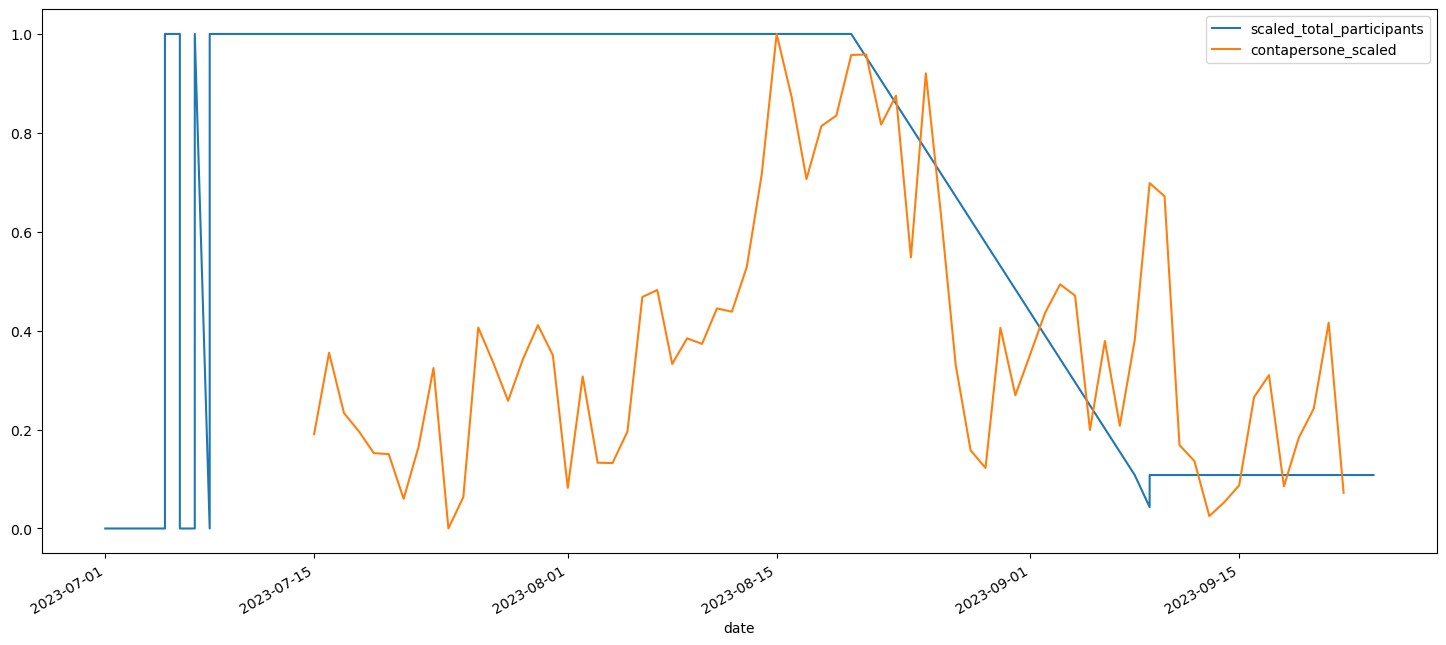

In [47]:
ax = eventi.plot(x="date", y="scaled_total_participants", figsize=(18,8))
contapersone[["date", "contapersone_scaled"]].plot(ax=ax, x="date", y="contapersone_scaled", figsize=(18,8))
#eventi.plot(ax=ax, x="date", y="scaled_daily_participants", figsize=(18,8)) #this is a random generated number

## Meteo

In [1141]:
meteotrentino_bollettino_df.rename(columns={"data": "date"}, inplace=True)
meteotrentino_bollettino_df["date"] = pd.to_datetime(meteotrentino_bollettino_df["date"])
meteo_timeframe_df = meteotrentino_bollettino_df[
    (meteotrentino_bollettino_df["comune"].str.contains("MOLVENO")) &
    (meteotrentino_bollettino_df["date"] >= START_DATE) &
    (meteotrentino_bollettino_df["date"] <= END_DATE)
]

In [1142]:
meteo_timeframe_df["tmin_scaled"] = scaler.fit_transform(meteo_timeframe_df[["tmin"]])
meteo_timeframe_df["tmax_scaled"] = scaler.fit_transform(meteo_timeframe_df[["tmax"]])
meteo_timeframe_df

,date,comune,ambito,meteo,tmin,tmax,probprec06-12,intprec06-12,probtemp06-12,probprec12-18,intprec12-18,probtemp12-18,tmin_scaled,tmax_scaled
36742,2023-07-01,MOLVENO,DOLOMITI,Molto nuvoloso con piogge deboli,14,24,media,moderata,media,media,moderata,media,0.666667,0.529412
36784,2023-07-04,MOLVENO,DOLOMITI,Nuvoloso,13,23,molto bassa,debole,molto bassa,media,moderata,media,0.583333,0.470588
36806,2023-07-06,MOLVENO,DOLOMITI,Nuvoloso con piogge deboli,12,23,media,debole,media,alta,moderata,alta,0.500000,0.470588
36816,2023-07-08,MOLVENO,DOLOMITI,Poco nuvoloso,13,26,media,debole,molto bassa,bassa,debole,bassa,0.583333,0.647059
36841,2023-07-11,MOLVENO,DOLOMITI,Poco nuvoloso,18,31,molto bassa,debole,molto bassa,bassa,debole,bassa,1.000000,0.941176
36863,2023-07-14,MOLVENO,DOLOMITI,Poco nuvoloso,12,26,molto bassa,debole,molto bassa,molto bassa,debole,molto bassa,0.500000,0.647059
36885,2023-07-15,MOLVENO,DOLOMITI,Sereno,13,27,molto bassa,debole,molto bassa,molto bassa,debole,molto bassa,0.583333,0.705882
36907,2023-07-16,MOLVENO,DOLOMITI,Sereno,14,27,molto bassa,debole,molto bassa,bassa,debole,bassa,0.666667,0.705882
36929,2023-07-17,MOLVENO,DOLOMITI,Poco nuvoloso,16,28,molto bassa,debole,molto bassa,bassa,debole,bassa,0.833333,0.764706
36951,2023-07-19,MOLVENO,DOLOMITI,Nuvoloso con piogge deboli,15,28,bassa,debole,bassa,alta,moderata,alta,0.750000,0.764706


### Feature encoding 
Convert ordinal weather data into numerical

- OneHot Encoding
- Frequency Encoding - replace each category of the variable by the count of the frequency at which the category occurs

In [1143]:
probprec = meteo_timeframe_df["probprec06-12"].value_counts(normalize=True)
probprec

probprec06-12
molto bassa    0.500000
--             0.230769
bassa          0.153846
media          0.057692
alta           0.057692
Name: proportion, dtype: float64

<Axes: xlabel='probprec06-12'>

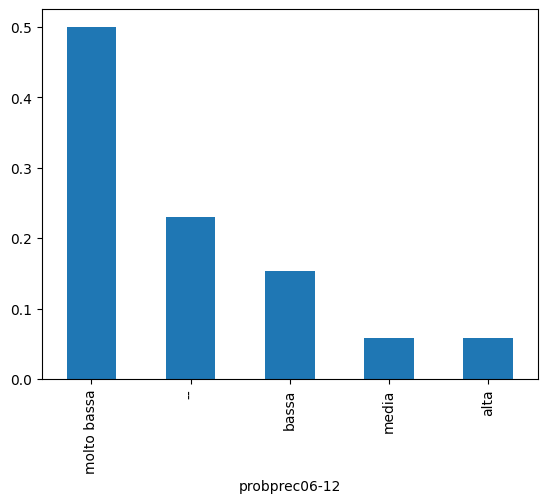

In [1144]:
probprec.plot(kind="bar")

In [1145]:
meteo_timeframe_df["probprec06-12"] = meteo_timeframe_df["probprec06-12"].map(probprec)

In [1146]:
categorical_features = ["intprec06-12", "probtemp06-12", "probprec12-18", "intprec12-18", "probtemp12-18"]
for col in categorical_features:
    frequency = meteo_timeframe_df[col].value_counts(normalize=True)
    meteo_timeframe_df[col] = meteo_timeframe_df[col].map(frequency)

In [1147]:
meteo_timeframe_df = meteo_timeframe_df.drop(['comune', 'ambito', 'meteo'], axis=1) # string non-relevant columns
meteo_timeframe_df.head()

,date,tmin,tmax,probprec06-12,intprec06-12,probtemp06-12,probprec12-18,intprec12-18,probtemp12-18,tmin_scaled,tmax_scaled
36742,2023-07-01,14,24,0.057692,0.057692,0.038462,0.153846,0.153846,0.096154,0.666667,0.529412
36784,2023-07-04,13,23,0.500000,0.692308,0.500000,0.153846,0.153846,0.096154,0.583333,0.470588
36806,2023-07-06,12,23,0.057692,0.692308,0.038462,0.096154,0.153846,0.057692,0.500000,0.470588
36816,2023-07-08,13,26,0.057692,0.692308,0.500000,0.384615,0.711538,0.442308,0.583333,0.647059
36841,2023-07-11,18,31,0.500000,0.692308,0.500000,0.384615,0.711538,0.442308,1.000000,0.941176


<Axes: xlabel='date'>

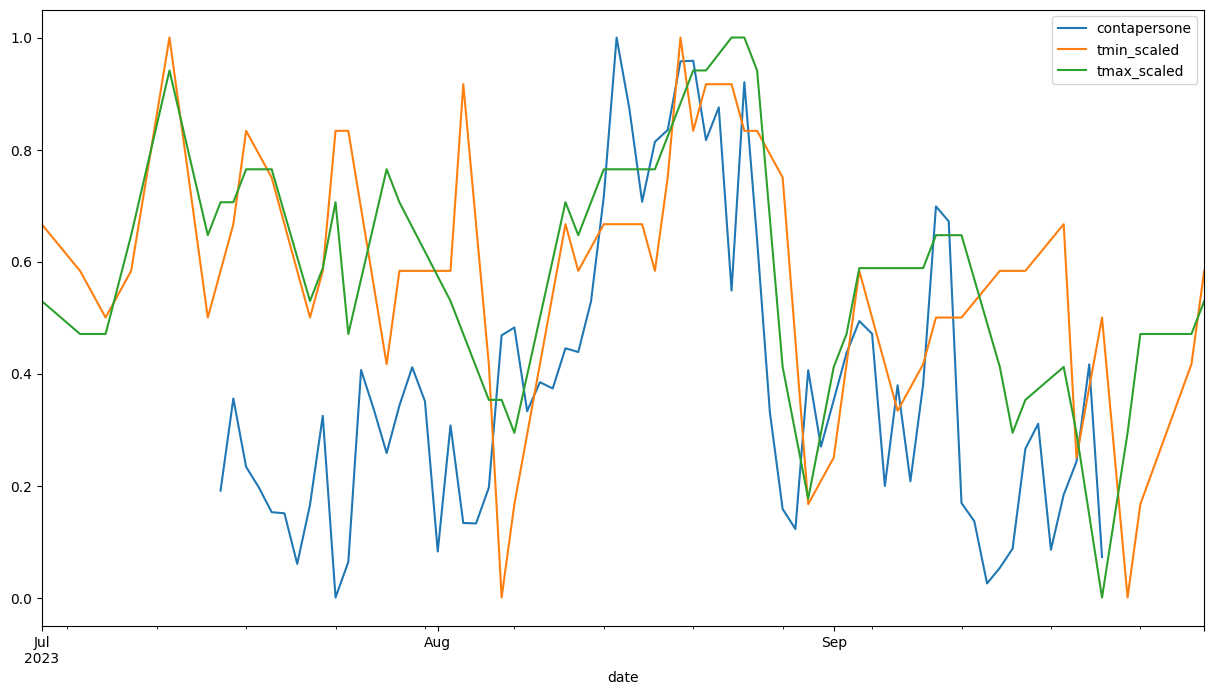

In [1148]:
ax = contapersone[["date", "contapersone_scaled"]].plot(x="date", y="contapersone_scaled", label="contapersone")
meteo_timeframe_df.plot(ax=ax, x="date", y="tmin_scaled", figsize=(15, 8))
meteo_timeframe_df.plot(ax=ax, x="date", y="tmax_scaled", figsize=(15, 8))


In [1232]:
visitors_lago_MolvenoAndalo_meteo_df

,date,tmin,tmax,probprec06-12,probtemp06-12,value_molveno_excursionists,value_lago_excursionists,value_andalo_excursionists,value_molveno_tourists,value_lago_tourists,value_andalo_tourists,contapersone
0,2023-07-15,13,27,0.500000,0.500000,5396,3636,2743,4635,3833,5587,1496
1,2023-07-16,14,27,0.500000,0.500000,6592,4756,3143,4357,3660,6036,2143
2,2023-07-17,16,28,0.500000,0.500000,4257,2818,1857,3775,3149,4670,1663
3,2023-07-19,15,28,0.153846,0.134615,2876,1871,1880,3550,3015,4493,1345
4,2023-07-22,12,24,0.153846,0.134615,3633,2308,2529,4405,3772,5701,1396
5,2023-07-23,13,25,0.230769,0.288462,5379,3621,2749,4282,3737,5829,2021
6,2023-07-24,16,27,0.500000,0.500000,1820,1003,2286,3578,3265,4205,746
7,2023-07-25,16,23,0.057692,0.038462,1961,1294,1645,3298,2953,4011,996
8,2023-07-28,11,28,0.230769,0.288462,3324,2055,1952,3707,3322,4524,1760
9,2023-07-29,13,27,0.230769,0.288462,4107,2446,2455,4381,3833,5179,2093


### Data preparation 

In [1013]:
visitors_lago_MolvenoAndalo

,date,value_molveno_excursionists,value_lago_excursionists,value_andalo_excursionists,contapersone,value_molveno_tourists,value_lago_tourists,value_andalo_tourists
0,2023-07-15,5396,3636,2743,1496,4635,3833,5587
1,2023-07-16,6592,4756,3143,2143,4357,3660,6036
2,2023-07-17,4257,2818,1857,1663,3775,3149,4670
3,2023-07-18,3827,2518,1913,1518,3664,3049,4525
4,2023-07-19,2876,1871,1880,1345,3550,3015,4493
...,...,...,...,...,...,...,...,...
65,2023-09-18,617,593,600,1081,1377,1085,439
66,2023-09-19,1253,737,830,1468,1579,1281,1469
67,2023-09-20,1126,830,751,1699,1768,1384,607
68,2023-09-21,1109,850,1223,2382,2129,1678,598


In [1149]:
visitors_lago_MolvenoAndalo_meteo_df = meteo_timeframe_df.merge(visitors_lago_MolvenoAndalo, on="date")
visitors_lago_MolvenoAndalo_meteo_df

,date,tmin,tmax,probprec06-12,intprec06-12,probtemp06-12,probprec12-18,intprec12-18,probtemp12-18,tmin_scaled,tmax_scaled,value_molveno_excursionists,value_lago_excursionists,value_andalo_excursionists,contapersone,value_molveno_tourists,value_lago_tourists,value_andalo_tourists
0,2023-07-15,13,27,0.500000,0.692308,0.500000,0.230769,0.711538,0.269231,0.583333,0.705882,5396,3636,2743,1496,4635,3833,5587
1,2023-07-16,14,27,0.500000,0.692308,0.500000,0.384615,0.711538,0.442308,0.666667,0.705882,6592,4756,3143,2143,4357,3660,6036
2,2023-07-17,16,28,0.500000,0.692308,0.500000,0.384615,0.711538,0.442308,0.833333,0.764706,4257,2818,1857,1663,3775,3149,4670
3,2023-07-19,15,28,0.153846,0.692308,0.134615,0.096154,0.153846,0.057692,0.750000,0.764706,2876,1871,1880,1345,3550,3015,4493
4,2023-07-22,12,24,0.153846,0.692308,0.134615,0.153846,0.153846,0.442308,0.500000,0.529412,3633,2308,2529,1396,4405,3772,5701
5,2023-07-23,13,25,0.230769,0.230769,0.288462,0.230769,0.711538,0.269231,0.583333,0.588235,5379,3621,2749,2021,4282,3737,5829
6,2023-07-24,16,27,0.500000,0.692308,0.500000,0.153846,0.153846,0.096154,0.833333,0.705882,1820,1003,2286,746,3578,3265,4205
7,2023-07-25,16,23,0.057692,0.057692,0.038462,0.096154,0.153846,0.057692,0.833333,0.470588,1961,1294,1645,996,3298,2953,4011
8,2023-07-28,11,28,0.230769,0.230769,0.288462,0.384615,0.711538,0.442308,0.416667,0.764706,3324,2055,1952,1760,3707,3322,4524
9,2023-07-29,13,27,0.230769,0.230769,0.288462,0.384615,0.711538,0.442308,0.583333,0.705882,4107,2446,2455,2093,4381,3833,5179


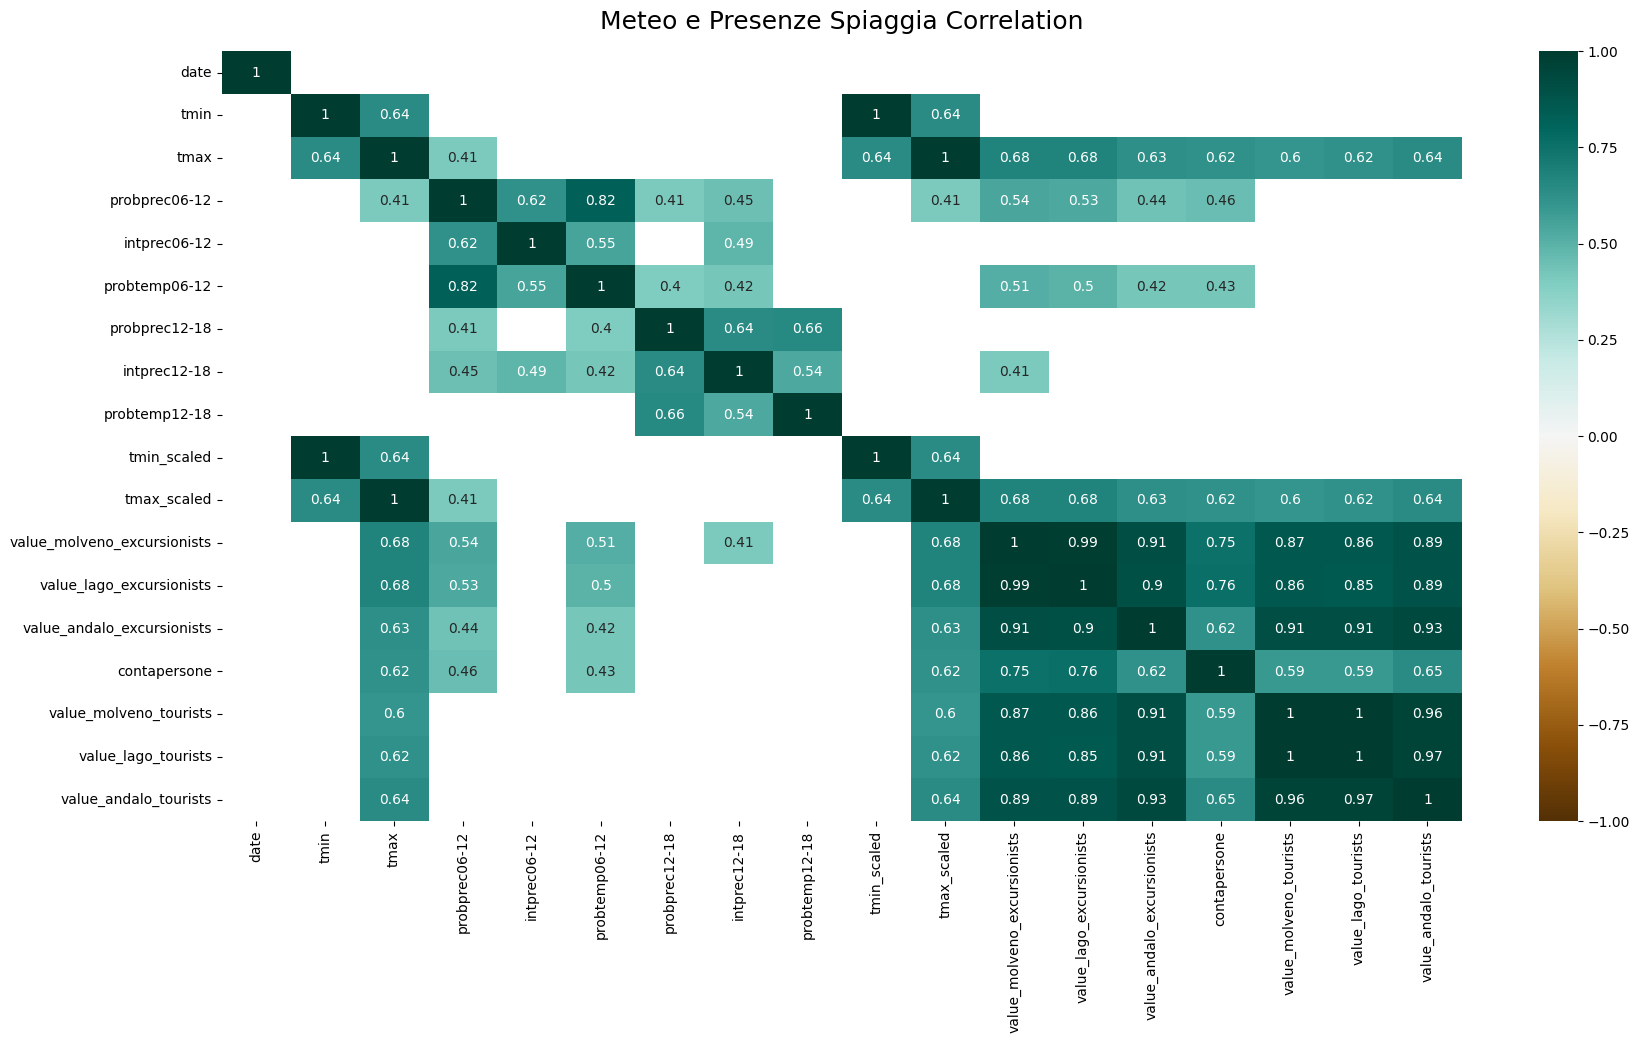

In [1150]:
plt.figure(figsize=(20, 10))
correlation = visitors_lago_MolvenoAndalo_meteo_df.corr()
visitors_corr = correlation[correlation>0.4]
heatmap = sns.heatmap(visitors_corr, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Meteo e Presenze Spiaggia Correlation', fontdict={'fontsize':18}, pad=16);

### Linear Regression

In [1151]:
visitors_lago_MolvenoAndalo_meteo_df = visitors_lago_MolvenoAndalo_meteo_df[[
 'date', 'tmin', 'tmax', 
 'probprec06-12', 'probtemp06-12',
 #'probprec06-12_molto bassa', 'probtemp06-12_molto bassa', 'probprec12-18_molto bassa', 'intprec12-18_debole',
 'value_molveno_excursionists',
 'value_lago_excursionists',
 'value_andalo_excursionists',
 'value_molveno_tourists',
 'value_lago_tourists',
 'value_andalo_tourists',
 'contapersone']]
visitors_lago_MolvenoAndalo_meteo_df.head()

,date,tmin,tmax,probprec06-12,probtemp06-12,value_molveno_excursionists,value_lago_excursionists,value_andalo_excursionists,value_molveno_tourists,value_lago_tourists,value_andalo_tourists,contapersone
0,2023-07-15,13,27,0.500000,0.500000,5396,3636,2743,4635,3833,5587,1496
1,2023-07-16,14,27,0.500000,0.500000,6592,4756,3143,4357,3660,6036,2143
2,2023-07-17,16,28,0.500000,0.500000,4257,2818,1857,3775,3149,4670,1663
3,2023-07-19,15,28,0.153846,0.134615,2876,1871,1880,3550,3015,4493,1345
4,2023-07-22,12,24,0.153846,0.134615,3633,2308,2529,4405,3772,5701,1396


In [1254]:
features = list(visitors_lago_MolvenoAndalo_meteo_df.columns)
features.remove("date")
features.remove("contapersone")
#features = list(filter(lambda el: not el.startswith("ratio"), features))
features 

['tmin',
 'tmax',
 'probprec06-12',
 'probtemp06-12',
 'value_molveno_excursionists',
 'value_lago_excursionists',
 'value_andalo_excursionists',
 'value_molveno_tourists',
 'value_lago_tourists',
 'value_andalo_tourists']

In [1263]:
# Step 1: Train test split
from sklearn.model_selection import train_test_split, cross_val_score

X = visitors_lago_MolvenoAndalo_meteo_df.loc[:, features].values
y = visitors_lago_MolvenoAndalo_meteo_df.loc[:, ["contapersone"]].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [1264]:
# Step 2: Standardisation
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [1265]:
# Step 3: Apply PCA transformation
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

In [1266]:
explained_variance

array([0.65426021, 0.15608063])

In [1267]:
explained_variance

array([0.65426021, 0.15608063])

In [1268]:
# Step 4: Fitting Linear Regression To the training set
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression() 
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [1269]:
# prints y-intercept
print(linear_regressor.intercept_)
# prints the coefficient
print(linear_regressor.coef_)

[2434.60606061]
[[278.2368723   32.70748128]]


In [1270]:
#Predicting
y_pred = linear_regressor.predict(X_test) # make predictionsc
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Root mean squared error: {rmse}, R2 score: {r2}, Mean Absolute Error: {mae}")

Root mean squared error: 700.7345022178099, R2 score: 0.5126270083980202, Mean Absolute Error: 518.0694280553666


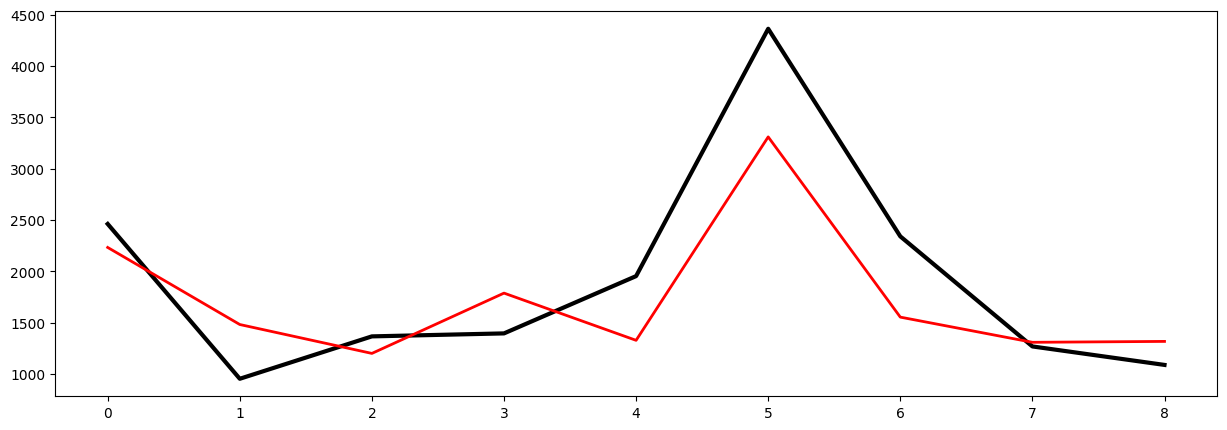

In [1214]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(range(len(y_test)), y_test, color='k', lw=3);
ax.plot(range(len(y_pred)), y_pred, color='r', lw=2);

<Axes: xlabel='date'>

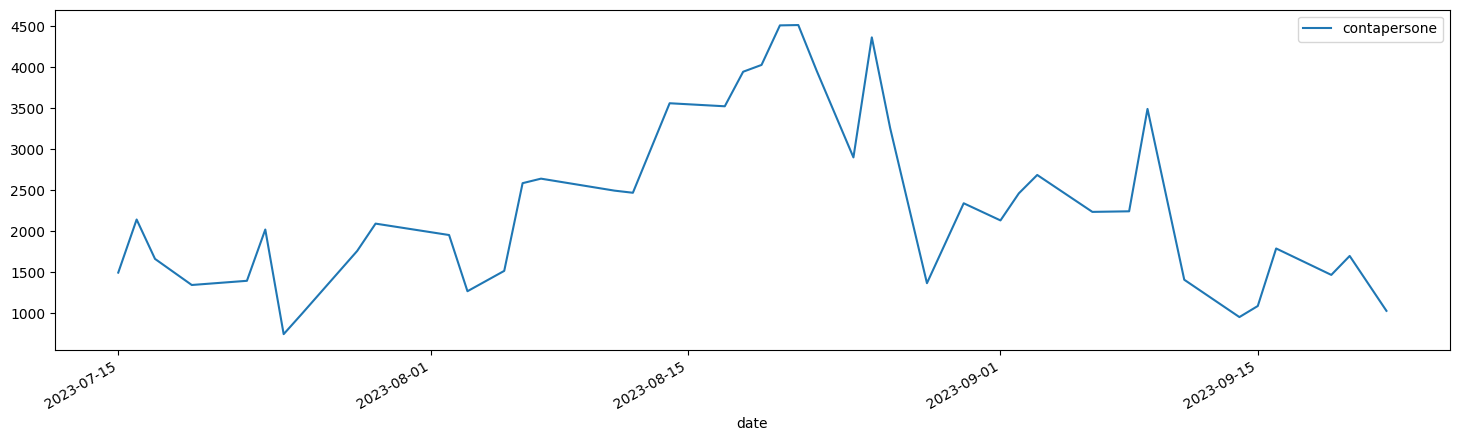

In [1171]:
visitors_lago_MolvenoAndalo_meteo_df.plot(x="date", y="contapersone", figsize=(18,5))

### Feature Importance / Selection

#### Recursive Feature Elimination (RFE)

In [1225]:
X = visitors_lago_MolvenoAndalo_meteo_df.loc[:, features].values
y = visitors_lago_MolvenoAndalo_meteo_df.loc[:, ["contapersone"]].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [1226]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator= linear_regressor , step = 1) 
fit = rfe.fit(X_train, y_train)
# It uses the model accuracy to identify which features (and combination of features) contribute the most to predicting the target variable.

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 5
Selected Features: [ True  True  True  True False False False  True False False]
Feature Ranking: [1 1 1 1 4 3 5 1 2 6]


In [1227]:
feature_importance_df = pd.DataFrame({"Feature": list(features), "Rank":fit.ranking_})
feature_importance_df.sort_values(by="Rank")

,Feature,Rank
0,tmin,1
1,tmax,1
2,probprec06-12,1
3,probtemp06-12,1
7,value_molveno_tourists,1
8,value_lago_tourists,2
5,value_lago_excursionists,3
4,value_molveno_excursionists,4
6,value_andalo_excursionists,5
9,value_andalo_tourists,6


In [1228]:
# Transforming the data
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Fitting our baseline model with the transformed data
lr_rfe_model = linear_regressor.fit(X_train_rfe, y_train)

In [1229]:
# making predictions and evaluating the model
y_pred_rfe = lr_rfe_model.predict(X_test_rfe)

rfe_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rfe))
rfe_mae = mean_absolute_error(y_test ,y_pred_rfe)

print("RFE Model RMSE:", rfe_rmse)
print("RFE Model MAE:", rfe_mae)

RFE Model RMSE: 693.0305618786427
RFE Model MAE: 509.77313539391594


## Traffico spiaggia - Contamezzi

In [624]:
contamezzi_df.rename(columns={"data": "date"}, inplace=True)
contamezzi_df["date"] = pd.to_datetime(contamezzi_df["date"])
contamezzi_df["day"] = pd.to_datetime(pd.to_datetime(contamezzi_df["date"]).dt.date)
contamezzi_df["hour"] = pd.to_datetime(contamezzi_df["date"]).dt.hour
contamezzi_df = contamezzi_df[
    (contamezzi_df["date"] >= START_DATE) &
    (contamezzi_df["date"] <= END_DATE)
]
contamezzi_df["total_cars"] = contamezzi_df[["cl1", "cl2", "cl3", "cl4", "cl5", "cl6", "cl7", "nonrilevato"]].sum(axis=1)
contamezzi_df

,date,sensore,direzione,comune,cl1,cl2,cl3,cl4,cl5,cl6,cl7,nonrilevato,day,hour,total_cars
78,2023-07-01 00:00:00,M40,1,MOLVENO,12,4,0,1,0,0,0,0,2023-07-01,0,17
79,2023-07-01 00:00:00,M40,2,MOLVENO,11,2,0,0,0,0,0,0,2023-07-01,0,13
80,2023-07-01 01:00:00,M40,1,MOLVENO,8,0,1,0,0,0,0,0,2023-07-01,1,9
81,2023-07-01 01:00:00,M40,2,MOLVENO,2,1,0,0,0,0,0,0,2023-07-01,1,3
82,2023-07-01 02:00:00,M40,1,MOLVENO,5,0,0,0,0,0,0,0,2023-07-01,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13583,2023-09-29 22:00:00,M47,2,MOLVENO,18,2,0,0,0,0,0,0,2023-09-29,22,20
13584,2023-09-29 23:00:00,M47,1,MOLVENO,11,5,0,0,0,0,0,2,2023-09-29,23,18
13585,2023-09-29 23:00:00,M47,2,MOLVENO,12,2,0,0,0,0,0,0,2023-09-29,23,14
13586,2023-09-30 00:00:00,M47,1,MOLVENO,8,3,0,1,0,0,0,0,2023-09-30,0,12


In [626]:
entrata_lago = contamezzi_df[(contamezzi_df["sensore"] == "M47") & (contamezzi_df["direzione"] == 1) & (contamezzi_df["day"] >= START_DATE) & (contamezzi_df["day"] <= END_DATE)]
entrata_lago = entrata_lago.reset_index().drop(columns=['index','sensore','direzione','comune'])

uscita_lago = contamezzi_df[(contamezzi_df["sensore"] == "M47") & (contamezzi_df["direzione"] == 2) & (contamezzi_df["day"] >= START_DATE) & (contamezzi_df["day"] <= END_DATE)]
uscita_lago = uscita_lago.reset_index().drop(columns=['index','sensore','direzione','comune'])

differenza_lago = entrata_lago.set_index(['date','day','hour']).subtract(uscita_lago.set_index(['date','day','hour']), fill_value=0).reset_index()

cumulativa_lago = differenza_lago.copy()
for c in ['cl1','cl2','cl3','cl4','cl5','cl6','cl7','nonrilevato','total_cars']: 
    cumulativa_lago[c] = cumulativa_lago[c].cumsum()
cumulativa_lago

,date,day,hour,cl1,cl2,cl3,cl4,cl5,cl6,cl7,nonrilevato,total_cars
0,2023-07-01 00:00:00,2023-07-01,0,6,-1,0,0,0,0,0,0,5
1,2023-07-01 01:00:00,2023-07-01,1,7,-1,0,0,0,0,0,0,6
2,2023-07-01 02:00:00,2023-07-01,2,7,-1,0,0,0,0,0,0,6
3,2023-07-01 03:00:00,2023-07-01,3,7,0,0,0,0,0,0,0,7
4,2023-07-01 04:00:00,2023-07-01,4,9,1,0,0,0,0,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...
2180,2023-09-29 20:00:00,2023-09-29,20,15443,2035,-81,920,1281,-51,-45,-3226,16276
2181,2023-09-29 21:00:00,2023-09-29,21,15444,2038,-79,920,1281,-51,-45,-3226,16282
2182,2023-09-29 22:00:00,2023-09-29,22,15440,2038,-79,920,1281,-51,-45,-3225,16279
2183,2023-09-29 23:00:00,2023-09-29,23,15439,2041,-79,920,1281,-51,-45,-3223,16283


### Entries in spiaggia during ferragosto

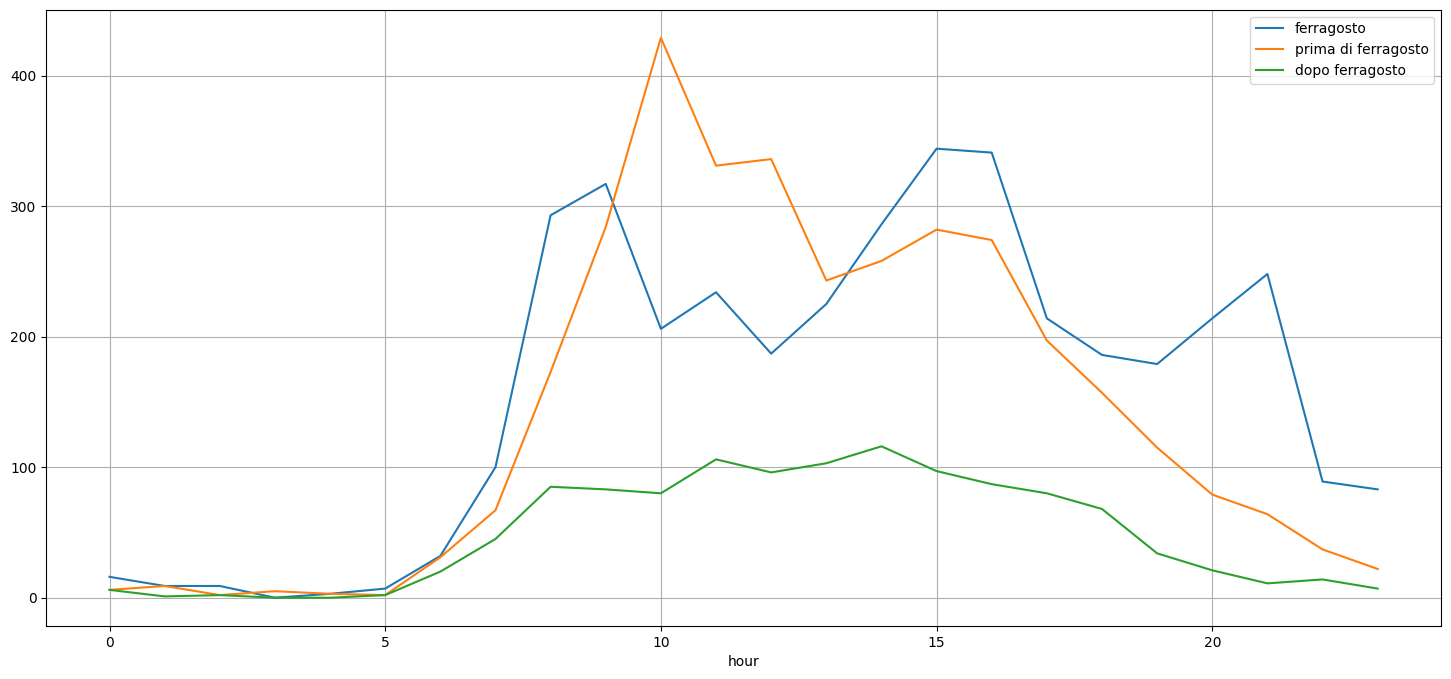

In [861]:
ax = entrata_lago[entrata_lago["day"] == "2023-08-15"].plot(x="hour", y="total_cars", label="ferragosto", figsize=(18, 8))
entrata_lago[entrata_lago["day"] == "2023-07-15"].plot(ax=ax, x="hour", y="total_cars", label="prima di ferragosto", figsize=(18, 8))
entrata_lago[entrata_lago["day"] == "2023-09-28"].plot(ax=ax, x="hour", y="total_cars", label="dopo ferragosto", figsize=(18, 8))
plt.grid()

# Alternative tool to model linear or non-linear relationships in our data